In [144]:
import numpy as np 
import matplotlib.pyplot as plt
import json 
from astropy import units as u
import itertools as it
import os
import matplotlib.colors as mccolors
from matplotlib.pyplot import cm
import random

In [2]:
json_list = os.listdir("/Users/snorris/manyTDE/data/sources/")
del json_list[64]
json_list[-32]

'ASASSN-14ae.json'

In [3]:
print(len(json_list))
type(json_list)

92


list

In [4]:
TDE_data = []
for file in range(len(json_list)):
    with open("/Users/snorris/manyTDE/data/sources/" + json_list[file]) as f:
        TDE_data.append(json.load(f))
print(TDE_data)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [5]:
type(TDE_data)

list

In [6]:
TDE_data[91].keys()

dict_keys(['name', 'catalog_version', 'catalog_creation_date', 'ra', 'dec', 'z', 'peak_year', 'peak_mjd', 'peak_limit', 'spectral_type', 'spectral_subtype', 'paper_ref', 'nickname', 'extinction', 'host', 'lightcurve'])

In [7]:
print(json_list[91])

AT2022hvp.json


In [8]:
from astropy.cosmology import WMAP9 as cosmo
Ho = cosmo.H(0)  
from astropy.constants import c
from astropy.constants import e
sol = c.to(u.km/u.s)



In [9]:
TDE_data[91].get('z')

0.112

In [10]:
TDE_data[59].get('lightcurve')['data']

[[57630.842524, 'UVW2.uvot', 0.0008790225168308824, 3.817546285283605e-05],
 [57635.247923, 'UVW2.uvot', 0.0006982324040771676, 3.790481002209443e-05],
 [57636.617443, 'UVW2.uvot', 0.0006792036326171801, 2.9497438973428475e-05],
 [57638.610965, 'UVW2.uvot', 0.0005915616341754767, 3.2113994178509945e-05],
 [57639.48179, 'UVW2.uvot', 0.0005345643593969647, 2.9019793938531063e-05],
 [57640.182468, 'UVW2.uvot', 0.0005445026528424219, 2.9559312188893226e-05],
 [57642.574542, 'UVW2.uvot', 0.0004528975799036195, 2.9503637972921845e-05],
 [57643.602521, 'UVW2.uvot', 0.0004405548635065516, 2.3916318274566952e-05],
 [57645.849684, 'UVW2.uvot', 0.00036307805477010324, 1.9710349460852806e-05],
 [57648.720847, 'UVW2.uvot', 0.0002992264636608183, 1.6244050250914658e-05],
 [57651.438241, 'UVW2.uvot', 0.00022080047330188878, 1.4383864073495485e-05],
 [57655.390176, 'UVW2.uvot', 0.00020137242498623648, 1.5304613271324827e-05],
 [57655.45011, 'UVW2.uvot', 0.00020701413487910202, 1.79810192907939e-05],
 

In [11]:
TDE_data[91]['lightcurve']["data"][0][0]
TDE_data[91].get('peak_mjd')

59694.95833333332

In [48]:
for json_file in json_list:
    tde_name = json_file[:-5]
    def plot_lightcurve(tde_name):
        with open("/Users/snorris/manyTDE/data/sources/{}.json".format(tde_name)) as f:
            TDE_data = json.load(f)
        flux_filter = []
        mag_filter = []
        absMag_filter = []
        error_filter = []
        flux_error_filter = []
        mag_error_filter = []
        mjd_date_filter = []
        peak_date_filter = []
        rest_time_filter = []
        lc_filters = TDE_data['lightcurve']['filters']
        for m in range(len(TDE_data)):
            peak_year = TDE_data[m].get('peak_mjd')
            for i in range (len(TDE_data[m]['lightcurve']["data"])):
                #for filter in lc_filters:
                    # find the observations whose filter == the filter in the loop
                flux_filter.append(TDE_data[m]['lightcurve']["data"][i][2])
                error_filter.append(TDE_data[m]['lightcurve']["data"][i][3])
                mjd_date_filter.append(TDE_data[m]['lightcurve']["data"][i][0])
                distance = (sol*TDE_data[m].get('z'))/Ho         
        distance_pc = distance.to(u.pc)
        distance_mod = (5*np.log10(distance_pc/(10*u.pc)))
        flux_filter = u.Jy*np.array(flux_filter)
        mag_filter = u.Magnitude(flux_filter.to(u.AB))     
        absMag_filter = mag_filter.value - distance_mod
        flux_error_filter = u.Jy * np.array(error_filter)
        mjd_date_filter= np.array(mjd_date_filter)
        peak_date_filter = mjd_date_filter - peak_year
        rest_time_filter = peak_date_filter*np.sqrt(1-TDE_data[m].get('z')**2)
        mag_error_filter = np.sqrt((2.5/np.log(10))*(flux_error_filter/flux_filter)**2)    
        lightcurve = plt.errorbar(rest_time_filter,absMag_filter,yerr = mag_error_filter,fmt='k.')
        plt.gca().invert_yaxis()
        plt.xlim(-5,150)
        plt.ylim(-10,-22)
        return(lightcurve)
plot_lightcurve(TDE_data[59].get('name'))

KeyError: 0

<ErrorbarContainer object of 3 artists>

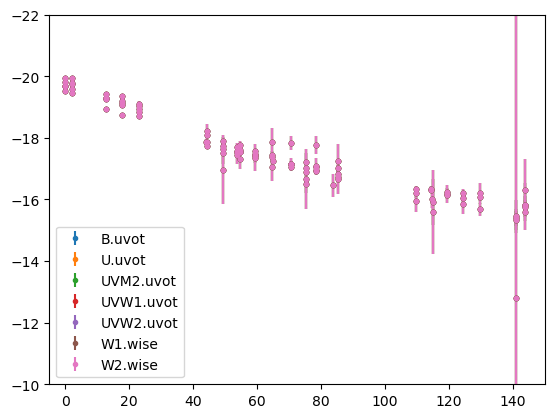

In [47]:
def plot_lightcurve(tde_name):
    with open("/Users/snorris/manyTDE/data/sources/{}.json".format(tde_name)) as f:
        tde_data = json.load(f)
    flux_filter = []
    mag_filter = []
    absMag_filter = []
    error_filter = []
    flux_error_filter = []
    mag_error_filter = []
    mjd_date_filter = []
    peak_date_filter = []
    rest_time_filter = []
    lc_filters = tde_data['lightcurve']['filters']
    for i in range (len(tde_data['lightcurve']["data"])):
        peak_year = tde_data.get('peak_mjd')
        flux_filter.append(tde_data['lightcurve']["data"][i][2])
        error_filter.append(tde_data['lightcurve']["data"][i][3])
        mjd_date_filter.append(tde_data['lightcurve']["data"][i][0])
        distance = (sol*tde_data.get('z'))/Ho         
    distance_pc = distance.to(u.pc)
    distance_mod = (5*np.log10(distance_pc/(10*u.pc)))
    flux_filter = u.Jy*np.array(flux_filter)
    mag_filter = u.Magnitude(flux_filter.to(u.AB))     
    absMag_filter = mag_filter.value - distance_mod
    flux_error_filter = u.Jy * np.array(error_filter)
    mjd_date_filter= np.array(mjd_date_filter)
    peak_date_filter = mjd_date_filter - peak_year
    rest_time_filter = peak_date_filter*np.sqrt(1-tde_data.get('z')**2)
    mag_error_filter = np.sqrt((2.5/np.log(10))*(flux_error_filter/flux_filter)**2) 
    for element in lc_filters: 
        lightcurve = plt.errorbar(rest_time_filter,absMag_filter,yerr = mag_error_filter,fmt='.',label= element)
        plt.gca().invert_yaxis()
        plt.xlim(-5,150)
        plt.ylim(-10,-22)
        plt.legend()
    return(lightcurve)
plot_lightcurve(TDE_data[60].get('name'))

In [90]:
lc_color_dict = {}
for surv in ['ztf','ps','sdss']:
  lc_color_dict['g.'+surv] = 'g'
  lc_color_dict['r.'+surv] = 'r'
  lc_color_dict['i.'+surv] = 'brown'

lc_color_dict['UVW2.uvot'] = 'violet'
lc_color_dict['UVM2.uvot'] = 'magenta'
lc_color_dict['UVW1.uvot'] = 'fuchsia'

lc_color_dict['U.uvot'] = 'darkblue'
lc_color_dict['u.sdss'] = 'darkblue'

lc_color_dict['F125LP'] = 'darkviolet'
lc_color_dict['F150LP'] = 'darkviolet'
lc_color_dict['F225W'] = 'magenta'

lc_color_dict['FUV'] = 'darkviolet'
lc_color_dict['NUV'] = 'magenta'

lc_color_dict['B.uvot'] = 'lightblue'
lc_color_dict['V.uvot'] = 'orange'
lc_color_dict['c.atlas'] = 'cyan'
lc_color_dict['o.atlas'] = 'orange'
lc_color_dict['W1.wise'] = 'cyan'
lc_color_dict['W2.wise'] = 'orange'

marker_dict = {key:'o' for key in lc_color_dict}
marker_dict['UVW1.uvot'] = 's'
marker_dict['UVM2.uvot'] = 's'
marker_dict['UVW2.uvot'] = 's'

marker_dict['r.ztf'] = 's'

marker_dict['F125LP'] = '*'
marker_dict['F150LP'] = 'd'
marker_dict['F225W'] = '*'
lc_color_dict.values()

dict_values(['g', 'r', 'brown', 'g', 'r', 'brown', 'g', 'r', 'brown', 'violet', 'magenta', 'fuchsia', 'darkblue', 'darkblue', 'darkviolet', 'darkviolet', 'magenta', 'darkviolet', 'magenta', 'lightblue', 'orange', 'cyan', 'orange', 'cyan', 'orange'])

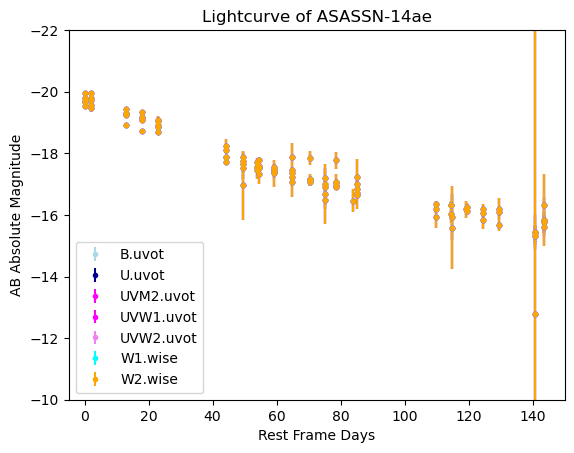

ASASSN-14ae


(None, <ErrorbarContainer object of 3 artists>)

In [115]:
for json_file in json_list:
    tde_name = json_file[:-5]
    def plot_lightcurve(tde_name):
        with open("/Users/snorris/manyTDE/data/sources/{}.json".format(tde_name)) as f:
            tde_data = json.load(f)
        flux_filter = []
        mag_filter = []
        absMag_filter = []
        error_filter = []
        flux_error_filter = []
        mag_error_filter = []
        mjd_date_filter = []
        peak_date_filter = []
        rest_time_filter = []
        lc_filters = tde_data['lightcurve']['filters']
        for i in range (len(tde_data['lightcurve']["data"])):
            peak_year = tde_data.get('peak_mjd')
            flux_filter.append(tde_data['lightcurve']["data"][i][2])
            error_filter.append(tde_data['lightcurve']["data"][i][3])
            mjd_date_filter.append(tde_data['lightcurve']["data"][i][0])
            distance = (sol*tde_data.get('z'))/Ho         
        distance_pc = distance.to(u.pc)
        distance_mod = (5*np.log10(distance_pc/(10*u.pc)))
        flux_filter = u.Jy*np.array(flux_filter)
        mag_filter = u.Magnitude(flux_filter.to(u.AB))     
        absMag_filter = mag_filter.value - distance_mod
        flux_error_filter = u.Jy * np.array(error_filter)
        mjd_date_filter= np.array(mjd_date_filter)
        peak_date_filter = mjd_date_filter - peak_year
        rest_time_filter = peak_date_filter*np.sqrt(1-tde_data.get('z')**2)
        mag_error_filter = np.sqrt((2.5/np.log(10))*(flux_error_filter/flux_filter)**2) 
        for element in lc_filters: 
            lightcurve = plt.errorbar(rest_time_filter,absMag_filter,yerr = mag_error_filter,fmt='.',label= element, color = lc_color_dict[element])
            plt.gca().invert_yaxis()
            plt.xlim(-5,150)
            plt.ylim(-10,-22)
            plt.legend()
            plt.xlabel("Rest Frame Days")
            plt.ylabel("AB Absolute Magnitude")
            plt.legend()
            plt.title("Lightcurve of {}".format(tde_name))
        plt.show()
        return(print(tde_name),lightcurve)
plot_lightcurve(json_list[60].replace('.json',''))

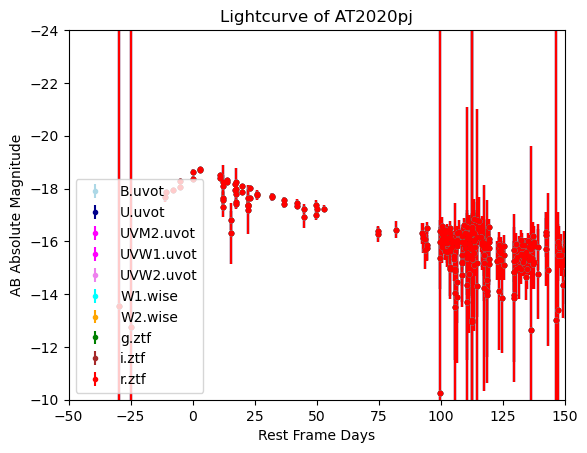

AT2020pj
[58198.435555600096, 'r.ztf', -6.461451524161199e-07, 3.8869954392524475e-06]


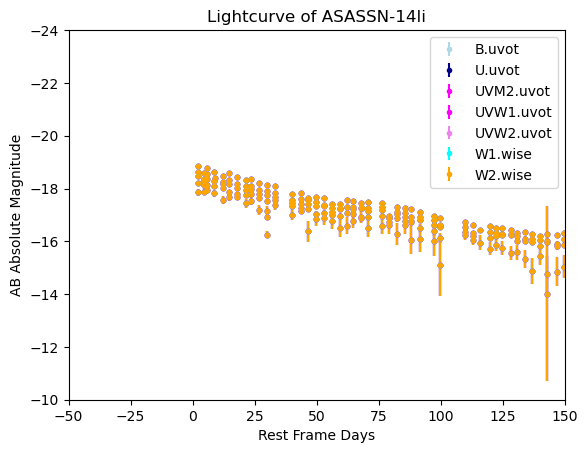

ASASSN-14li
[56995.310622, 'UVW2.uvot', 0.0014859356422869967, 6.453336499086068e-05]


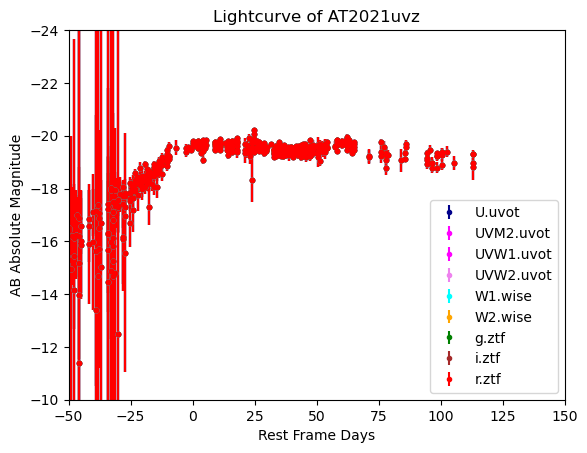

AT2021uvz
[58696.27053239988, 'g.ztf', 1.307366809971799e-06, 2.4787669413261743e-06]


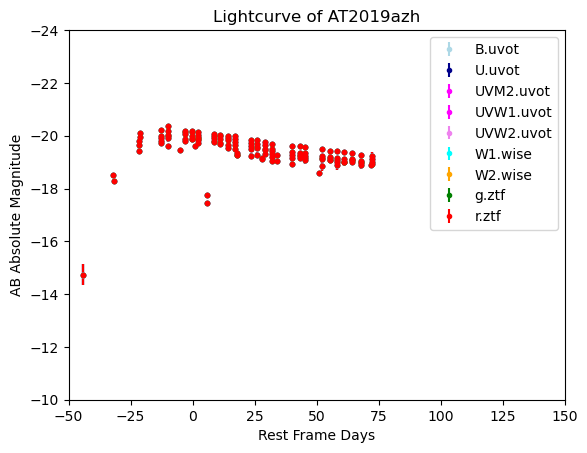

AT2019azh
[58206.252488399856, 'g.ztf', 4.2817593990503866e-07, 2.537338634543346e-05]


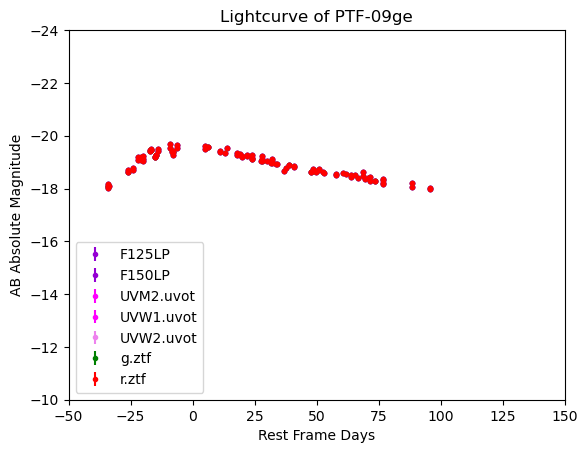

PTF-09ge
[58059.435208, 'UVM2.uvot', 1.0665961212302456e-05, 4.284755491294794e-06]


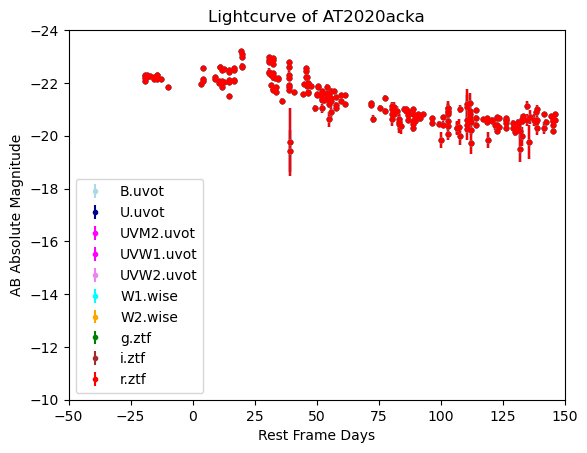

AT2020acka
[58508.51682869997, 'r.ztf', -1.6956447529523302e-06, 5.6861448431822245e-06]


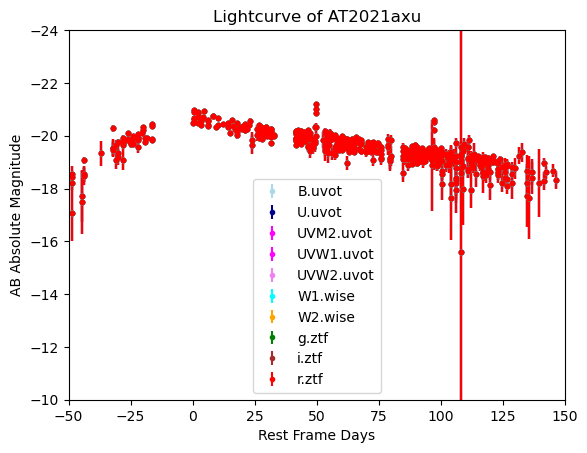

AT2021axu
[58522.4407060002, 'g.ztf', 4.102868705489578e-06, 2.054074792082753e-06]


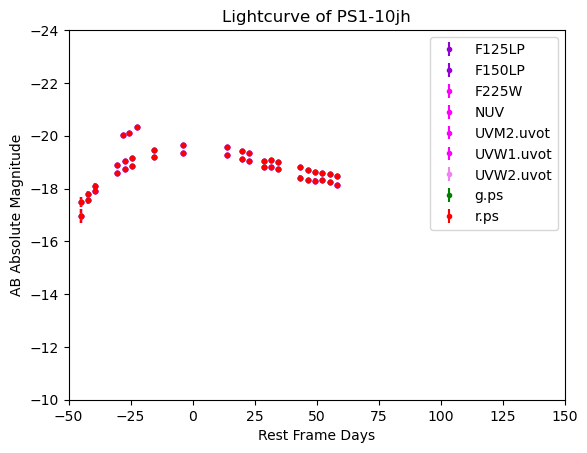

PS1-10jh
[58063.785061, 'UVW1.uvot', 2.07014134879102e-06, 3.4163936652508406e-06]


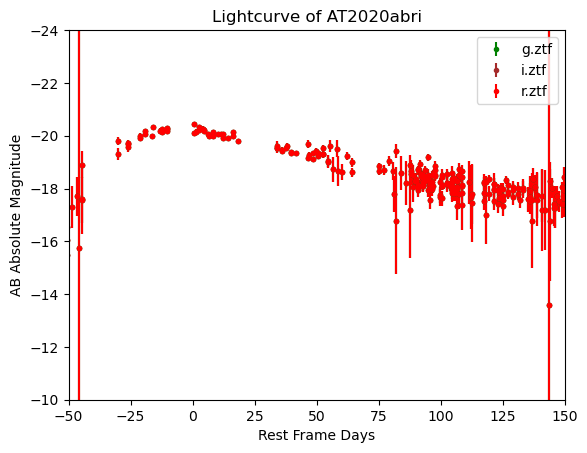

AT2020abri
[58486.555381900165, 'g.ztf', -1.6881718113873453e-06, 2.6465205102951656e-06]


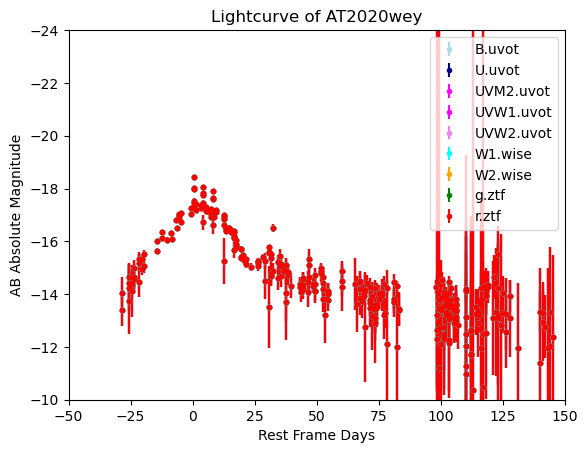

AT2020wey
[58422.52891199989, 'r.ztf', 7.005085040378452e-06, 6.0473508567369216e-06]


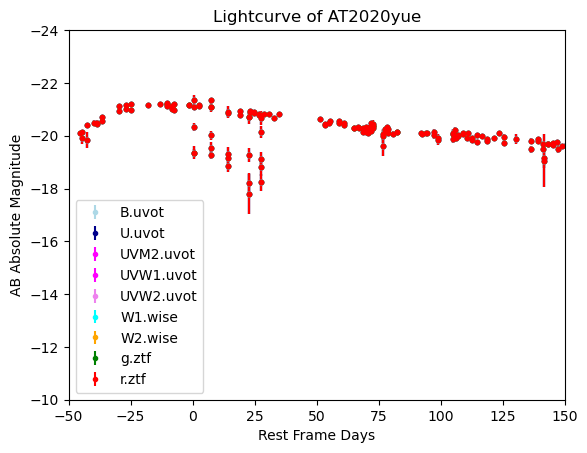

AT2020yue
[58476.4469444002, 'r.ztf', 3.400595887114865e-06, 6.026516889727195e-06]


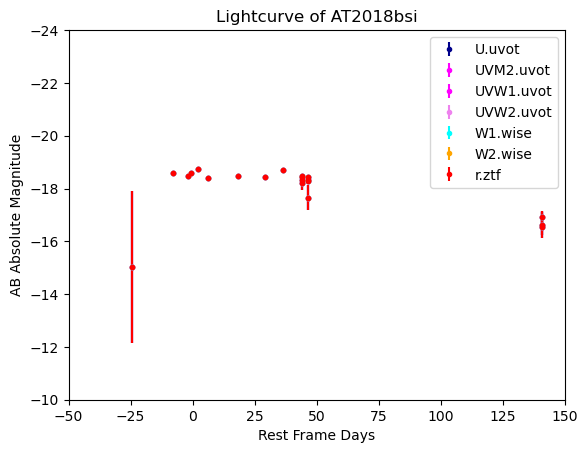

AT2018bsi
[58271.38605, 'UVW2.uvot', 0.00017701089583174257, 1.3453099676883495e-05]


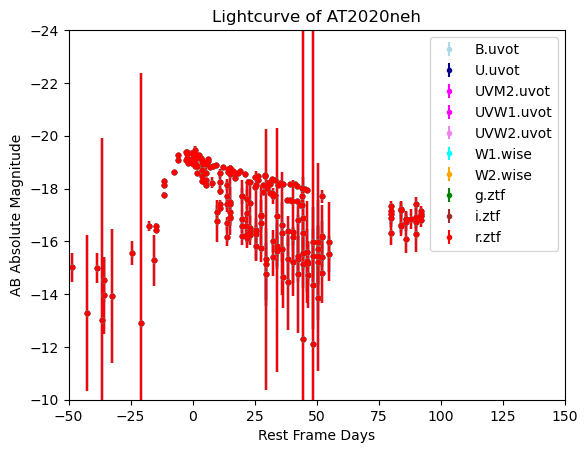

AT2020neh
[58312.19113430008, 'r.ztf', 2.3974040047444935e-06, 3.4933735046611765e-06]


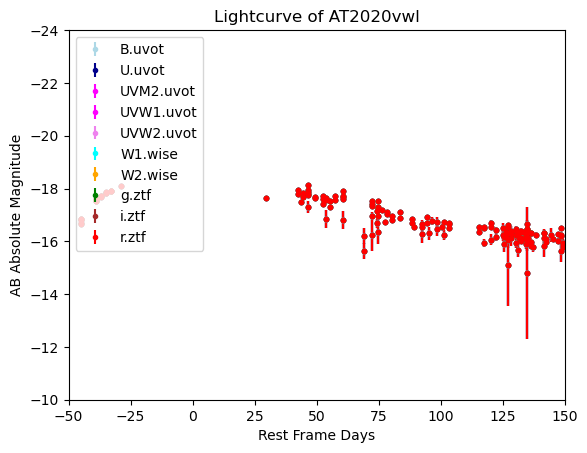

AT2020vwl
[58481.55642359983, 'r.ztf', 4.7401956573201215e-06, 6.622568936561995e-06]


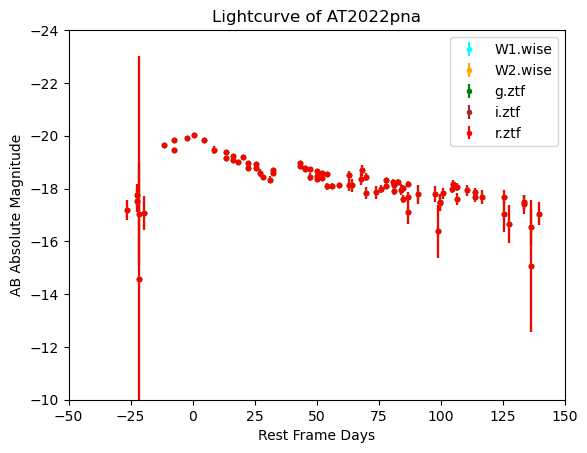

AT2022pna
[59073.41908559995, 'g.ztf', -6.8048807515581905e-06, 5.041413927437091e-06]


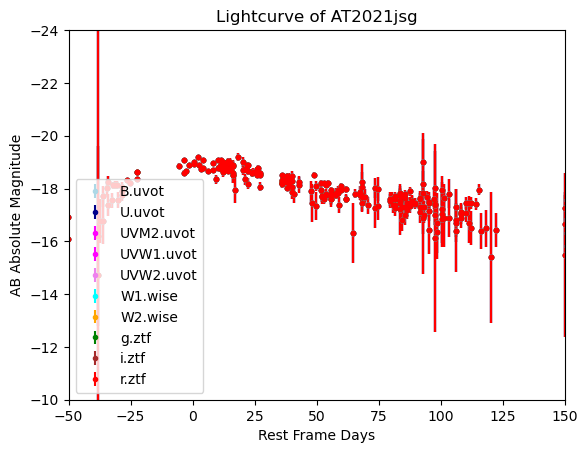

AT2021jsg
[58567.25687499996, 'g.ztf', 1.1805468533913216e-06, 2.180041254413607e-06]


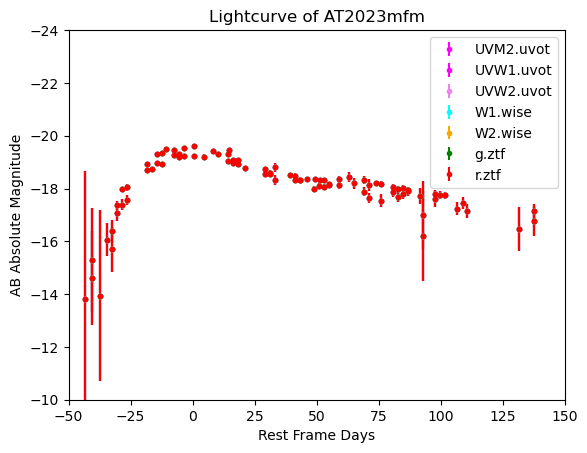

AT2023mfm
[59424.30704860017, 'g.ztf', 3.789112927749718e-06, 5.739585413562561e-06]


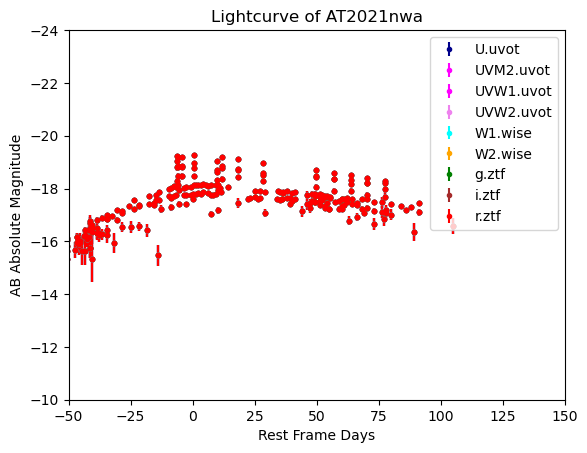

AT2021nwa
[58672.201597199775, 'r.ztf', -4.517430728745087e-06, 4.4835054287709475e-06]


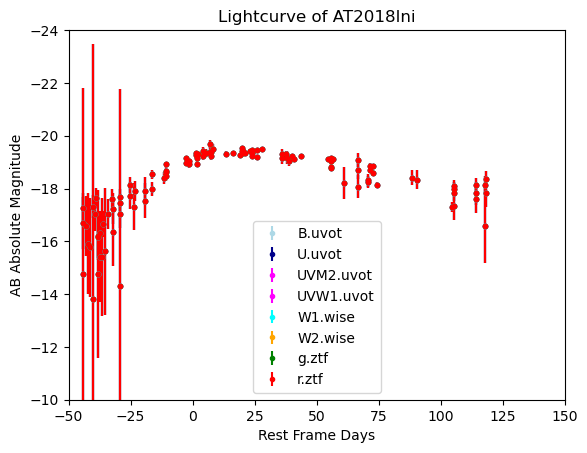

AT2018lni
[58312.44966439996, 'r.ztf', -3.4692592957670292e-06, 3.295246864676296e-06]


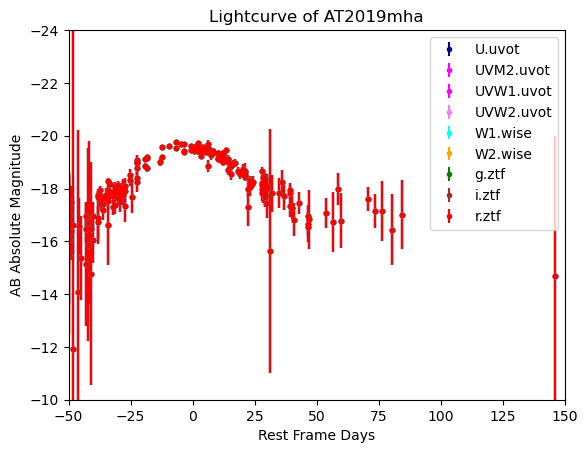

AT2019mha
[58198.428935199976, 'r.ztf', -3.6320349920505115e-06, 2.811255615479388e-06]


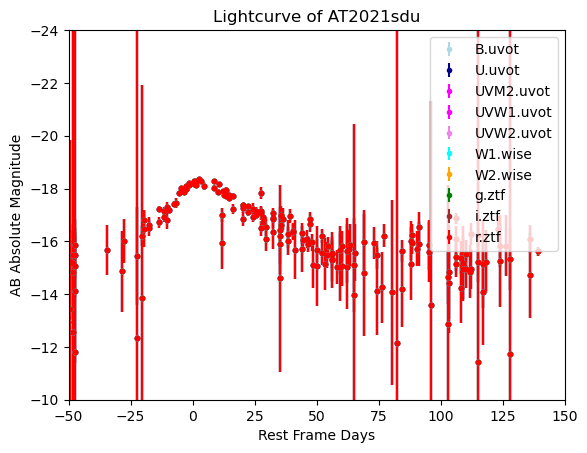

AT2021sdu
[58685.46487270016, 'g.ztf', 5.25989772705376e-06, 6.770553092752942e-06]


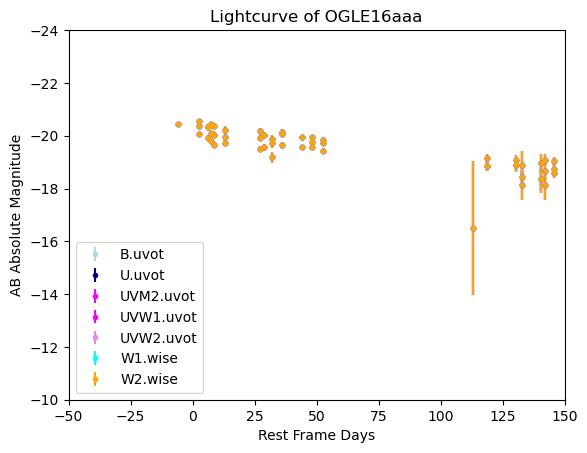

OGLE16aaa
[57420.516418, 'UVW2.uvot', 5.8076441752130634e-05, 5.04445563630519e-06]


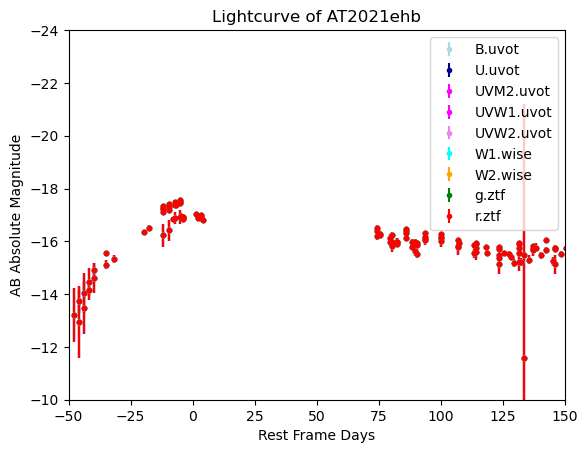

AT2021ehb
[58584.14607639983, 'r.ztf', 3.3822702380596694e-05, 3.417498509882663e-05]


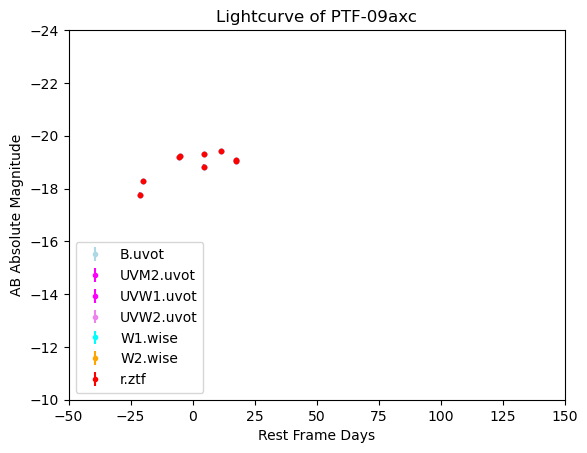

PTF-09axc
[58084.69112, 'UVW2.uvot', 3.4994516702835476e-06, 2.0137251288709226e-06]


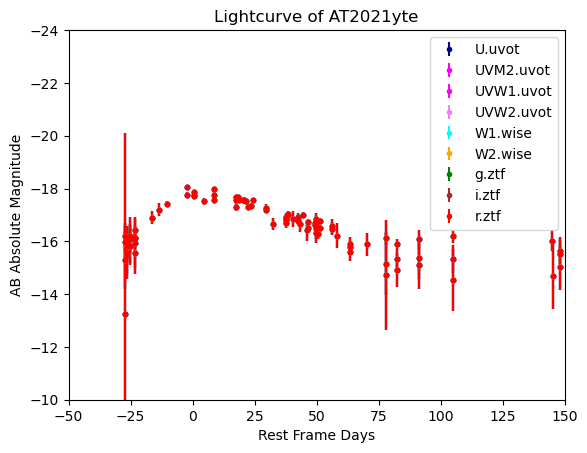

AT2021yte
[58756.519166700076, 'r.ztf', -2.7133043729647113e-06, 4.663709574919002e-06]


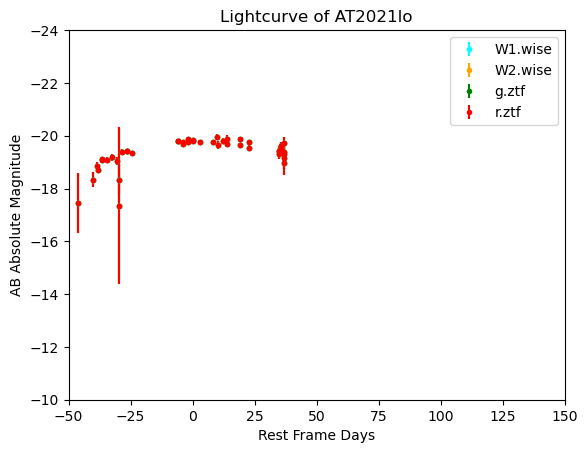

AT2021lo
[58692.48910879996, 'r.ztf', -8.447937625808526e-06, 3.982698673555982e-06]


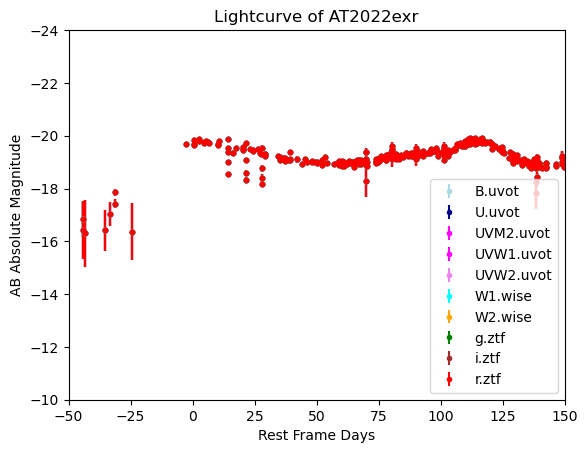

AT2022exr
[58953.43292819988, 'g.ztf', 6.807248525562307e-06, 4.369091893394262e-06]


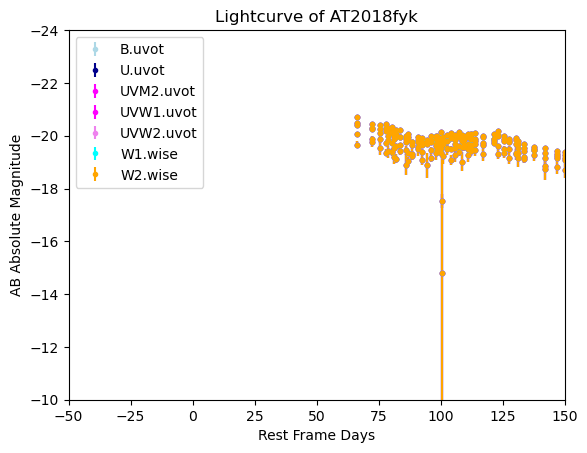

AT2018fyk
[58393.118942, 'UVW2.uvot', 0.0008090958991783779, 4.3923235542964906e-05]


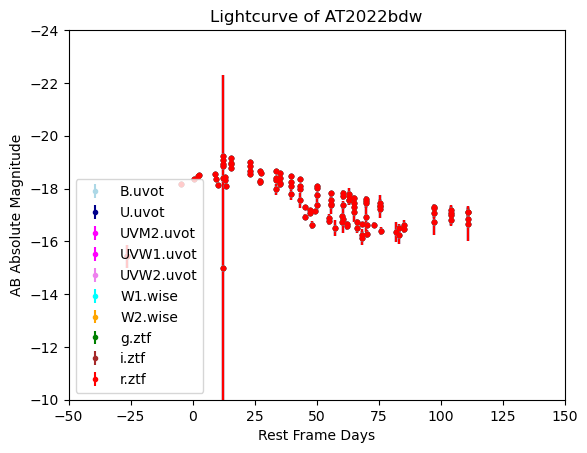

AT2022bdw
[58899.20495369984, 'g.ztf', -1.5073396090222244e-06, 3.6244468498370667e-06]


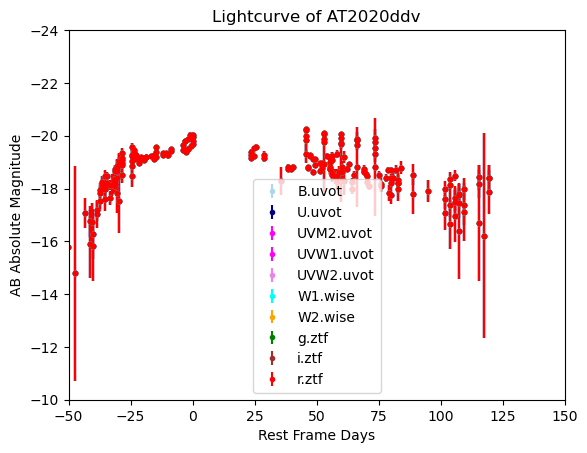

AT2020ddv
[58205.25456020003, 'g.ztf', 2.6725297517224436e-06, 5.6938714110756015e-06]


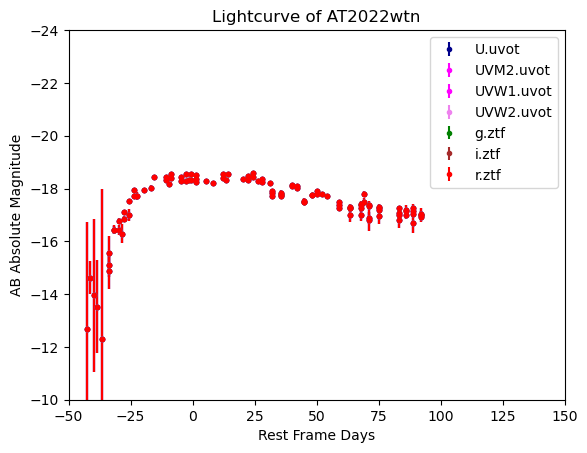

AT2022wtn
[59155.19739580015, 'g.ztf', 1.5017819054638952e-05, 7.084242266068782e-06]


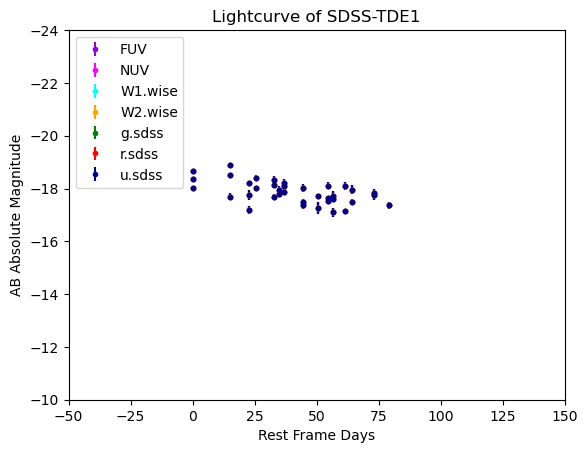

SDSS-TDE1
[57006.92498898, 'W1.wise', 5.444530263805959e-07, 1.0911181065835398e-05]


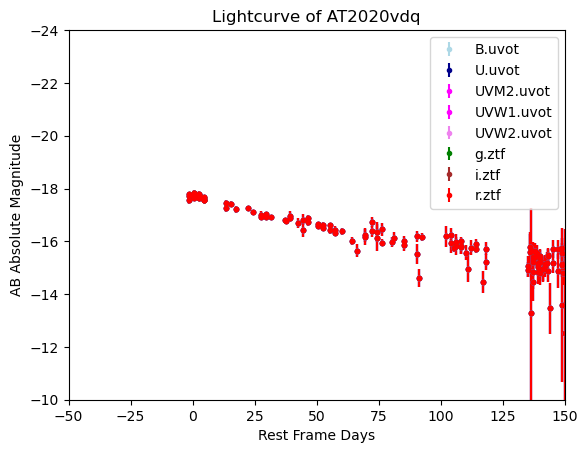

AT2020vdq
[58397.52393520018, 'r.ztf', 5.203361346343126e-06, 4.929704016654449e-06]


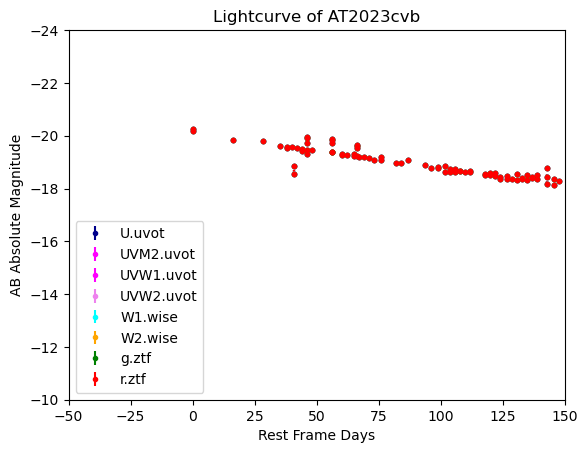

AT2023cvb
[59295.50923610013, 'r.ztf', -5.166280367955917e-06, 4.800558119037497e-06]


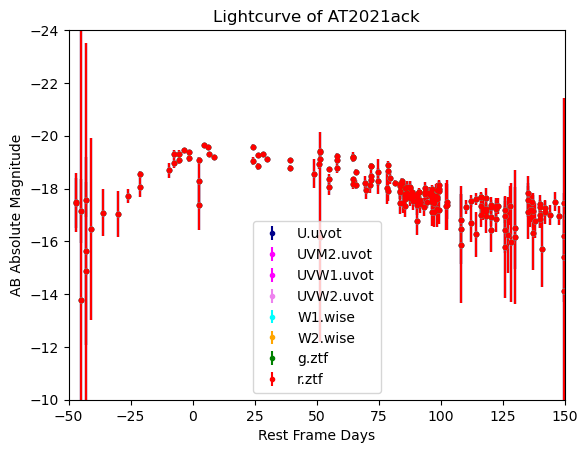

AT2021ack
[58507.522187499795, 'g.ztf', 8.462168685666783e-06, 8.756338341635125e-06]


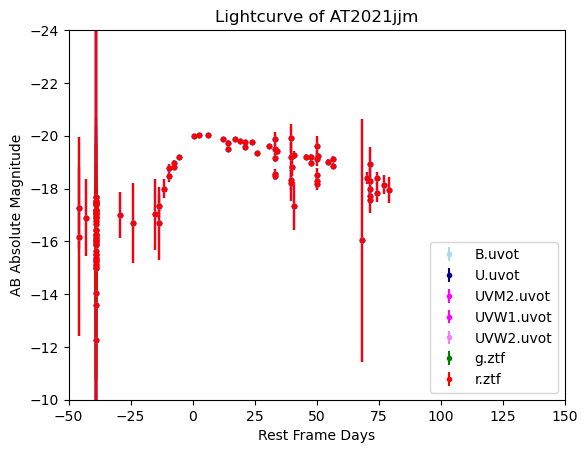

AT2021jjm
[58634.23039350007, 'g.ztf', -1.1804463369145113e-07, 2.8031137499822144e-06]


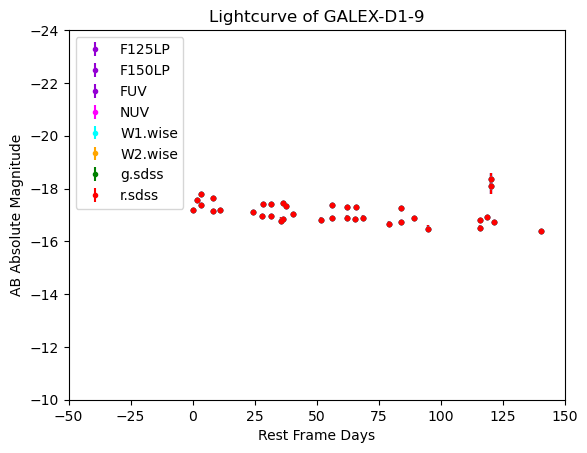

GALEX-D1-9
[59215.93018093, 'W1.wise', 2.1898193266733745e-06, 2.0587578165198946e-05]


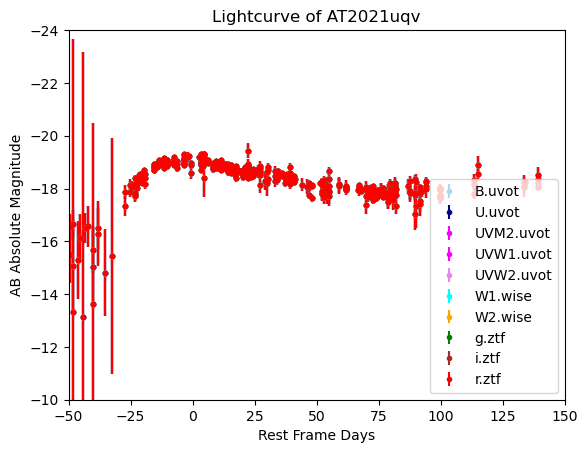

AT2021uqv
[58724.3988541998, 'r.ztf', 1.2038039448709675e-05, 3.506818271107377e-06]


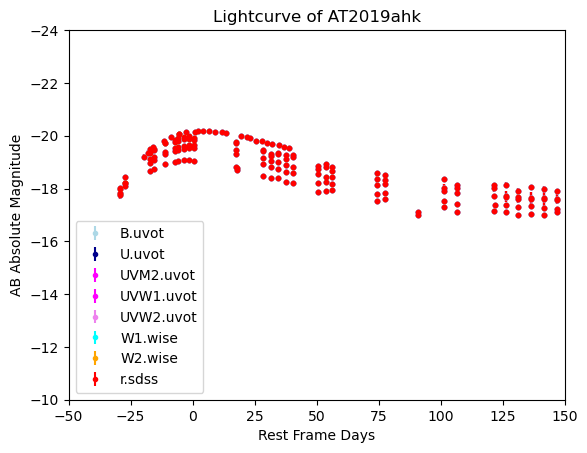

AT2019ahk
[58526.837252, 'UVW2.uvot', 0.0008241381150129962, 3.5791863567629166e-05]


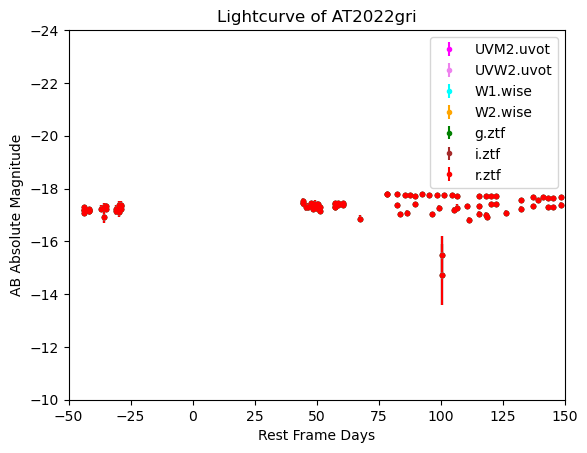

AT2022gri
[59087.51385420002, 'r.ztf', -2.491854278062309e-06, 2.163771960483345e-05]


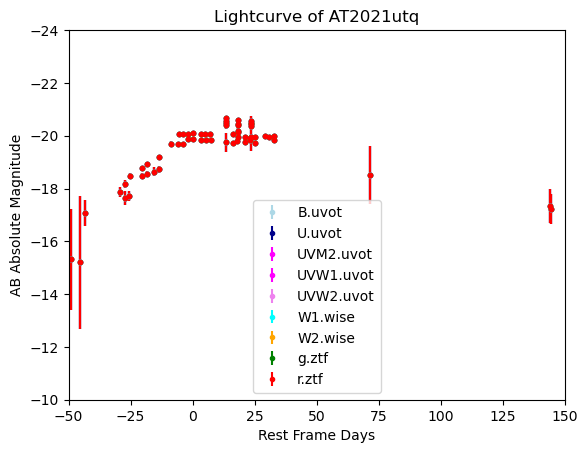

AT2021utq
[58730.1668866002, 'r.ztf', -3.0209367703638844e-06, 5.13440953305234e-06]


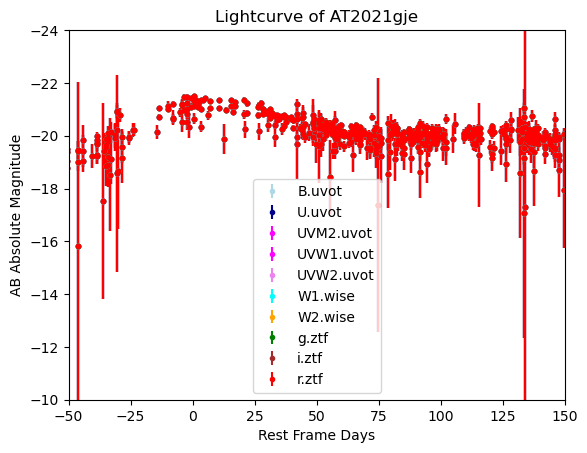

AT2021gje
[58580.50863429997, 'r.ztf', 5.072602152214155e-06, 3.5562818341694478e-06]


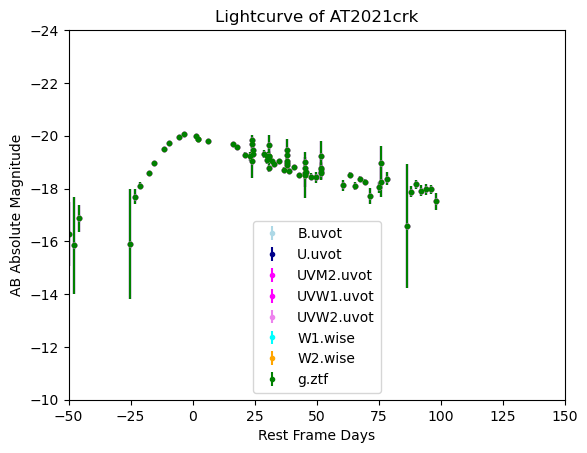

AT2021crk
[58586.17165509984, 'g.ztf', 8.215480722854118e-07, 3.884277987154595e-06]


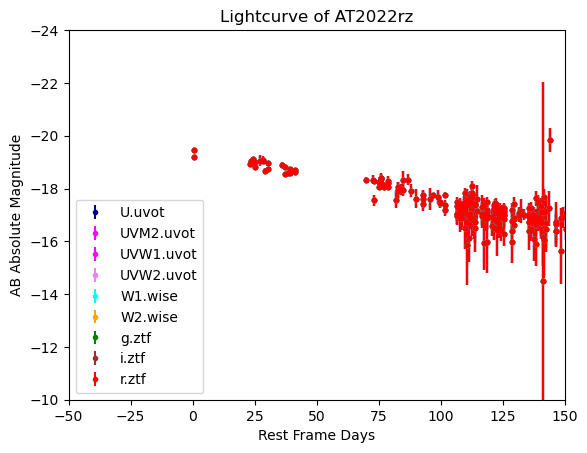

AT2022rz
[58872.43285880005, 'g.ztf', 3.282744658155786e-06, 2.470799425100632e-06]


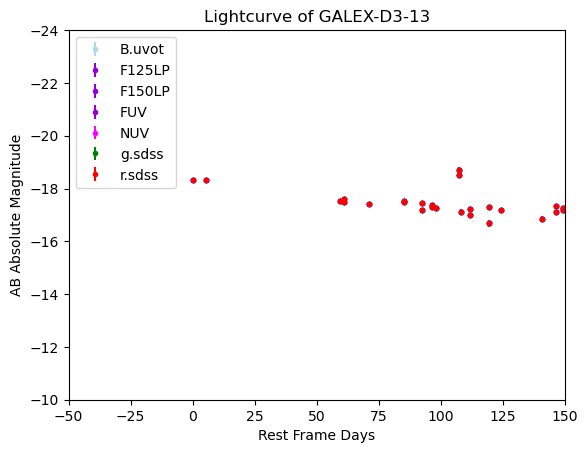

GALEX-D3-13
[57584.457406, 'F150LP', 2.67746e-07, 4.289940606198595e-08]


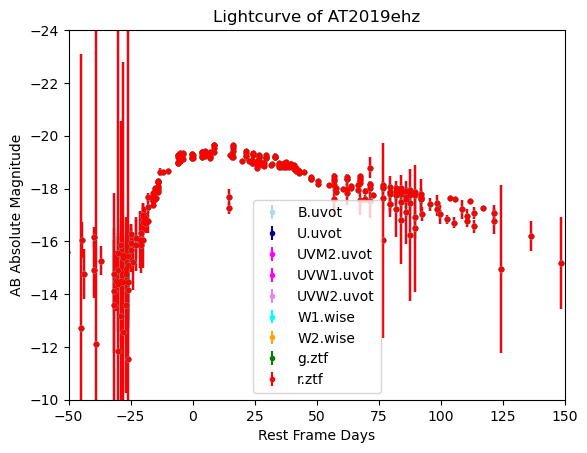

AT2019ehz
[58202.307812499814, 'g.ztf', -2.832070975796145e-06, 4.205729045131327e-06]


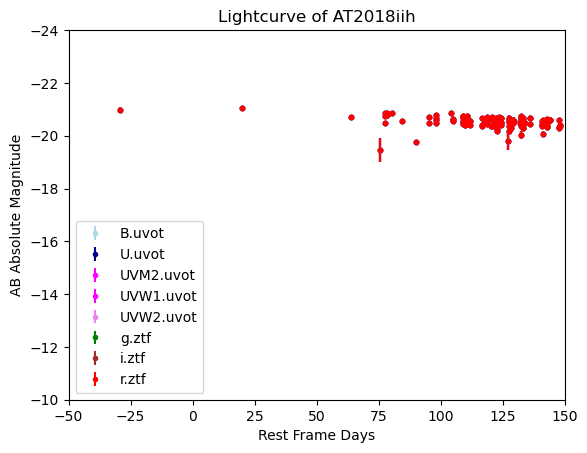

AT2018iih
[58198.45462960005, 'r.ztf', -4.912770518101731e-06, 2.9104121210243703e-06]


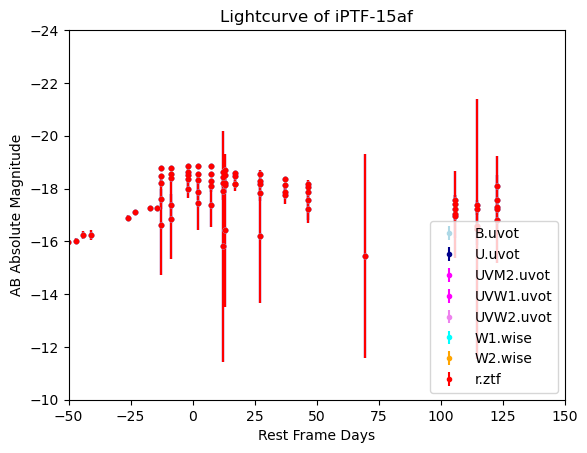

iPTF-15af
[57060.25214, 'UVW2.uvot', 0.00010864256236170688, 7.077429800027881e-06]


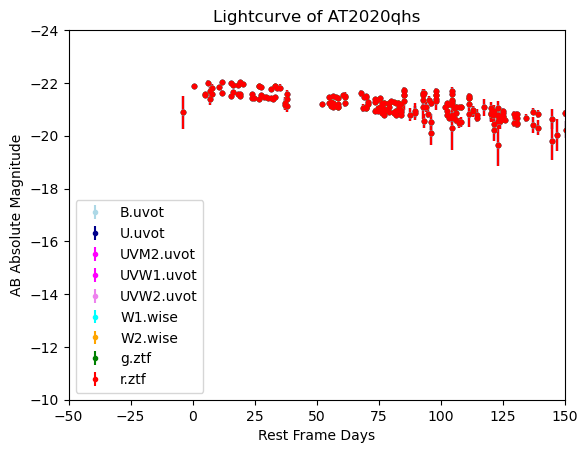

AT2020qhs
[58335.50020830007, 'g.ztf', 9.182323513678145e-06, 8.89544856251421e-06]


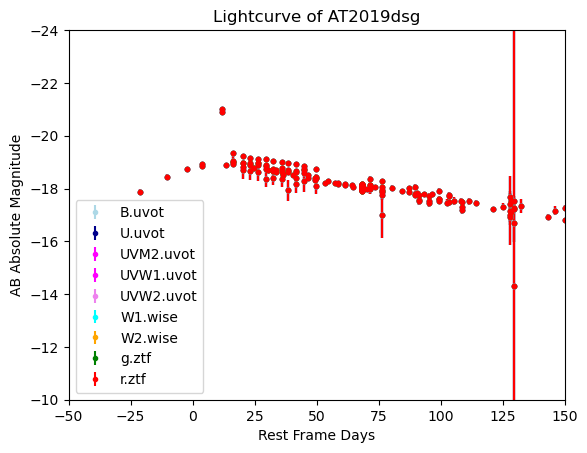

AT2019dsg
[58231.48298610002, 'g.ztf', -4.367219225707469e-06, 3.4123635329349478e-06]


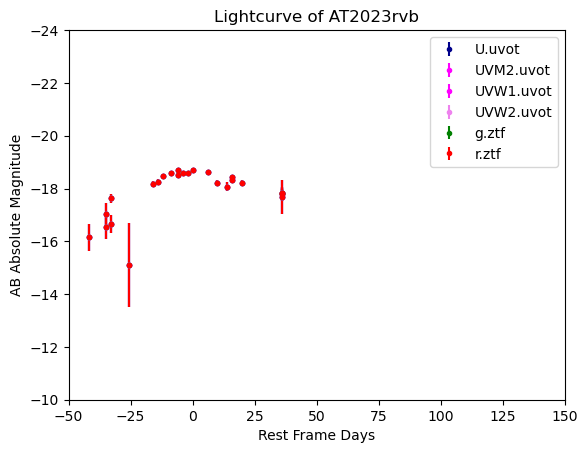

AT2023rvb
[59488.13127310015, 'g.ztf', -6.887066467558984e-06, 6.154600193551391e-06]


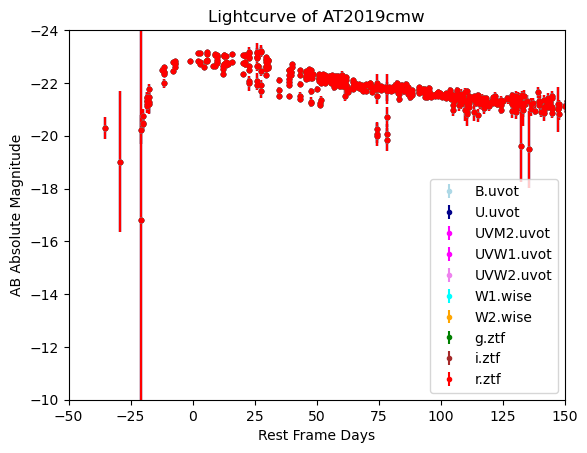

AT2019cmw
[58198.47276620008, 'r.ztf', 4.06539730357726e-06, 3.135708461260023e-06]


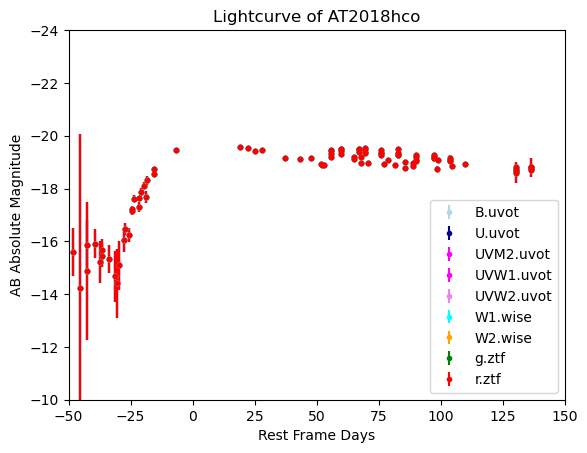

AT2018hco
[58283.446111099795, 'g.ztf', 2.6017216712328126e-07, 3.4898726236273424e-06]


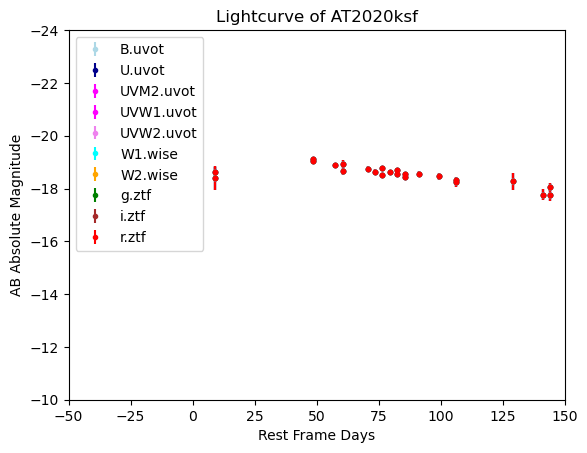

AT2020ksf
[58271.43815970002, 'r.ztf', -1.3637993633347883e-05, 1.3843760288755024e-05]


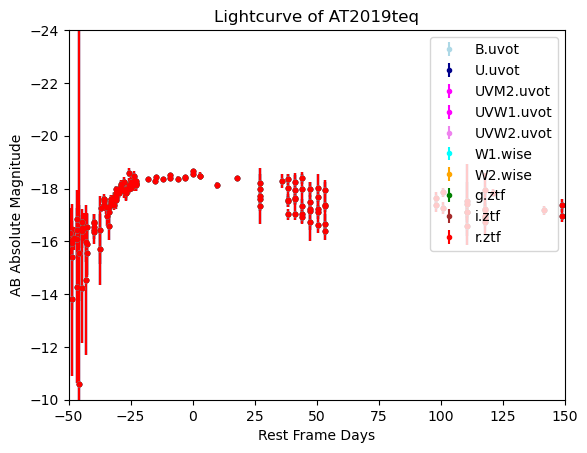

AT2019teq
[58198.44370369986, 'r.ztf', -3.457246308567893e-06, 3.534452513849826e-06]


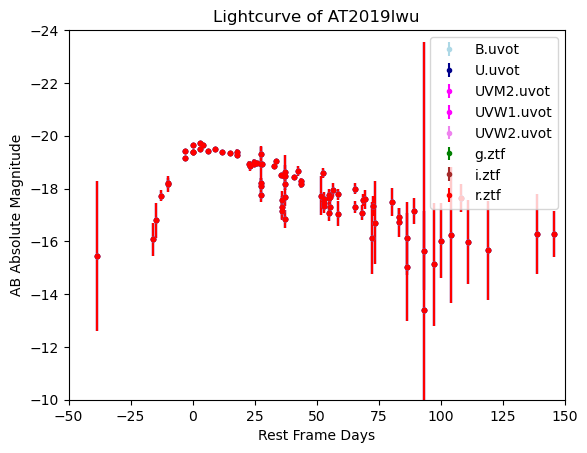

AT2019lwu
[58271.48265049979, 'g.ztf', -1.2469317512320752e-05, 1.0858770339512286e-05]


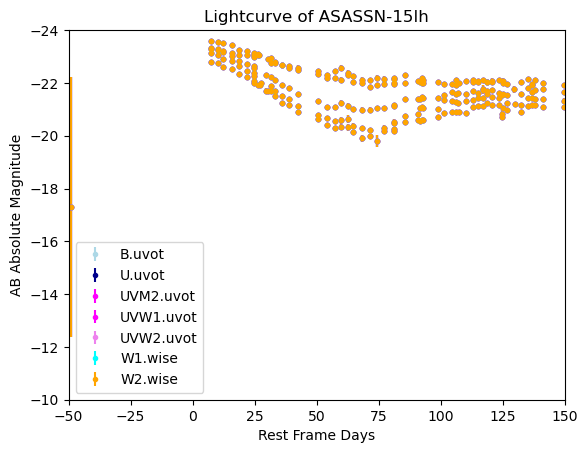

ASASSN-15lh
[57201.819587, 'UVW2.uvot', 0.0003908408957923977, 1.6974004434476217e-05]


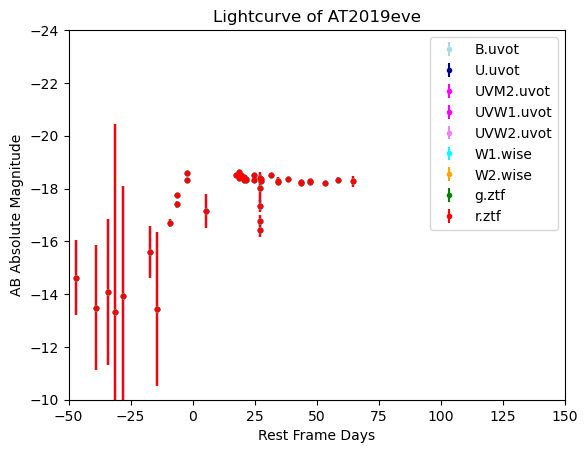

AT2019eve
[58205.281099500135, 'g.ztf', 2.0296104895284163e-06, 6.206067751856609e-06]


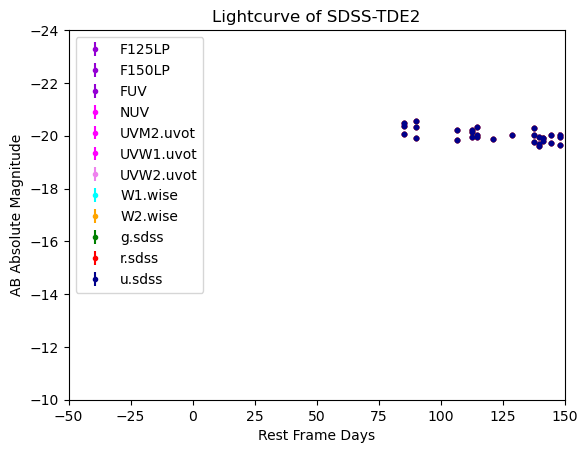

SDSS-TDE2
[58054.164343, 'UVW1.uvot', 1.8197008586099898e-06, 2.4103724269072303e-06]


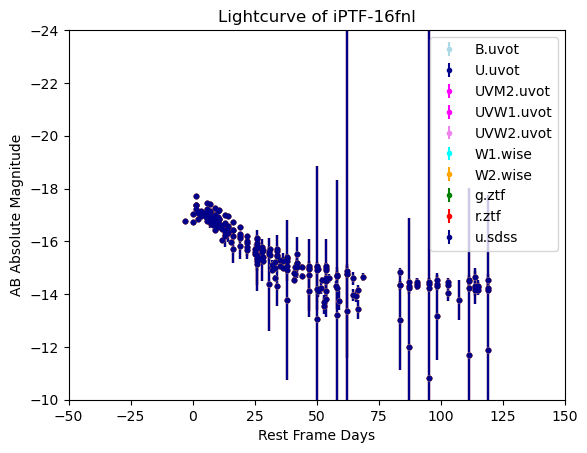

iPTF-16fnl
[57636.617443, 'UVW2.uvot', 0.0006792036326171801, 2.9497438973428475e-05]


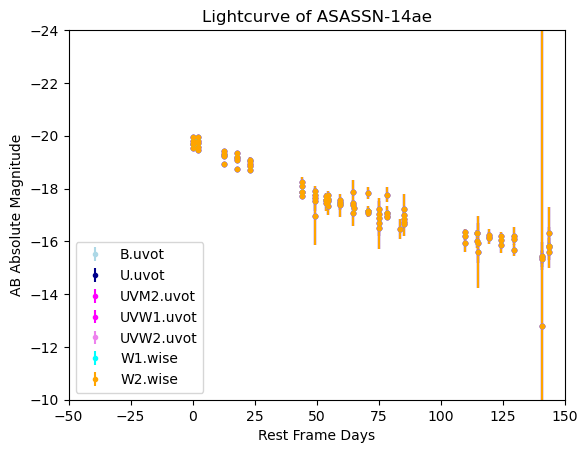

ASASSN-14ae
[56697.737048, 'UVW2.uvot', 0.00038018939632055966, 1.651141569001475e-05]


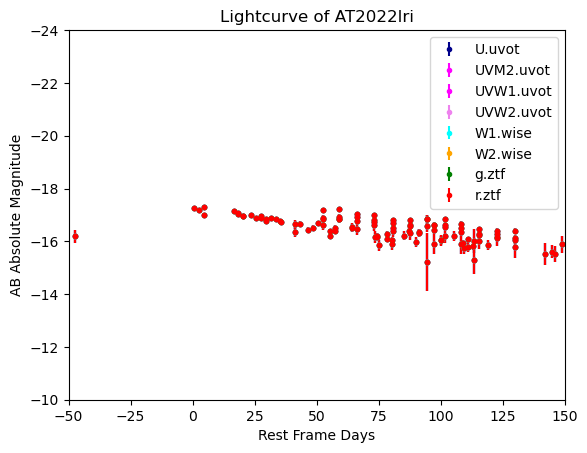

AT2022lri
[59130.37331019994, 'g.ztf', 3.837293246792709e-06, 5.269817454215857e-06]


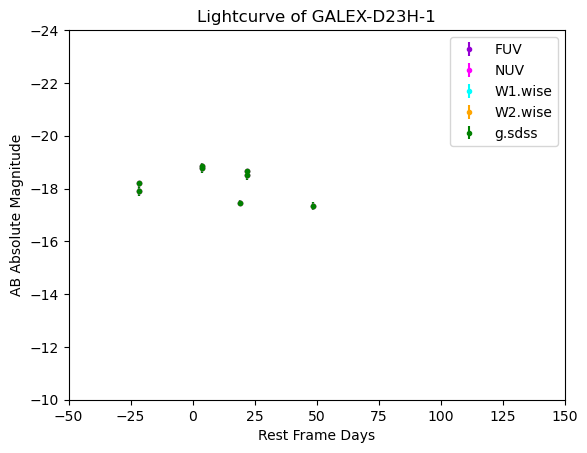

GALEX-D23H-1
[57189.20954909, 'W1.wise', -6.180757165300541e-06, 1.1496777852013686e-05]


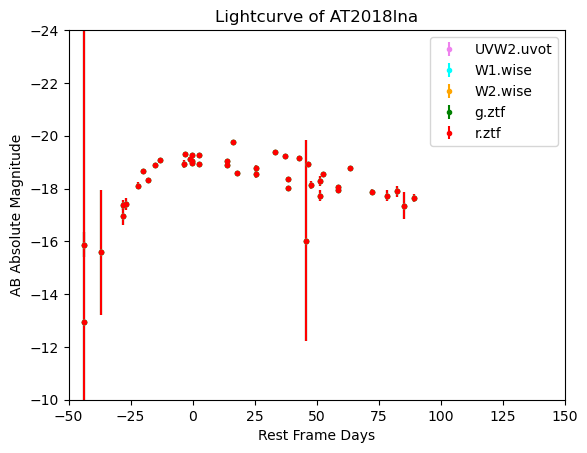

AT2018lna
[58207.241238399874, 'g.ztf', -5.441462982033417e-06, 8.866311125164588e-06]


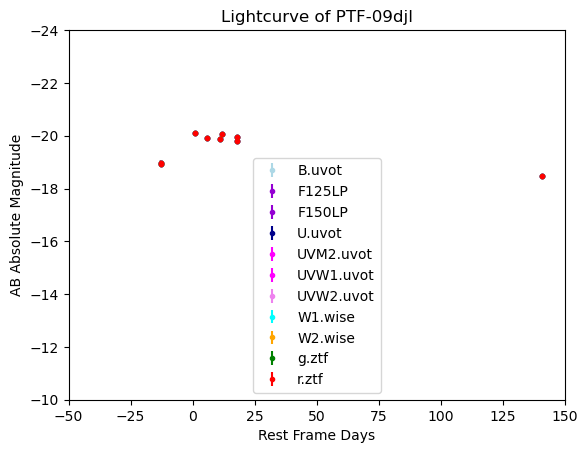

PTF-09djl
[58054.753173, 'UVM2.uvot', 1.9952623149688664e-06, 2.144665248017704e-06]


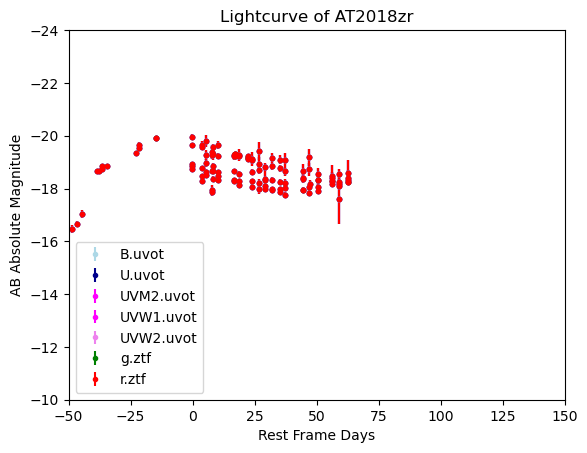

AT2018zr
[58210.376469, 'UVW2.uvot', 9.817479430199703e-05, 1.1725112142519631e-05]


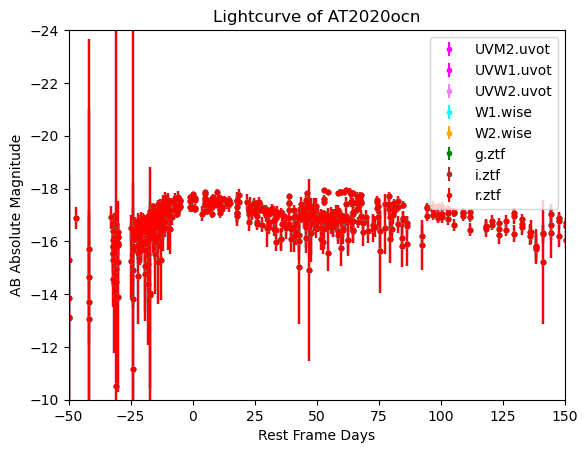

AT2020ocn
[58257.21815969981, 'r.ztf', -1.3996569271355832e-05, 5.00735447768698e-06]


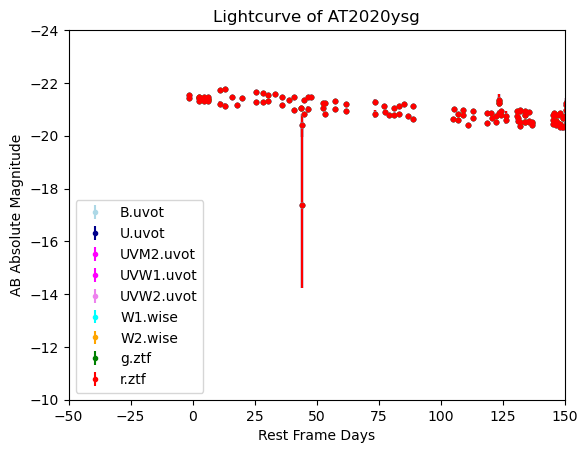

AT2020ysg
[58426.54271990014, 'r.ztf', 1.0961481892804836e-07, 4.16504203845277e-06]


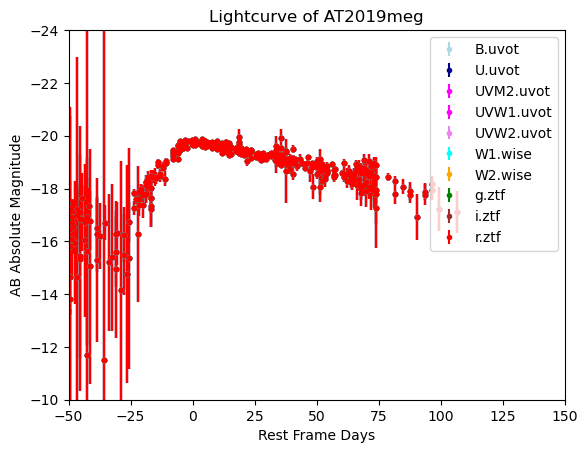

AT2019meg
[58198.47276620008, 'r.ztf', -3.1489438507712506e-07, 3.228274811494401e-06]


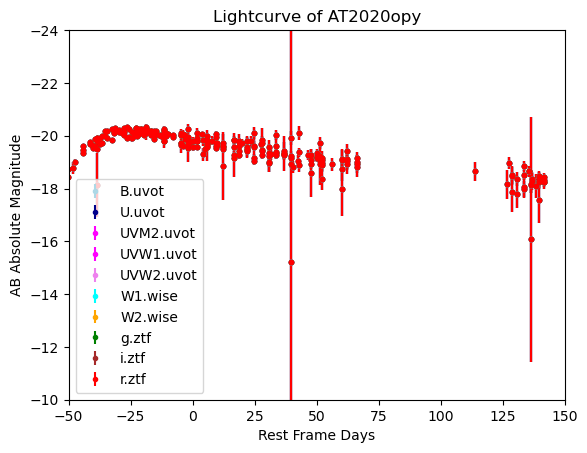

AT2020opy
[58363.13365740003, 'i.ztf', -2.598900444694479e-07, 8.465292793071815e-06]


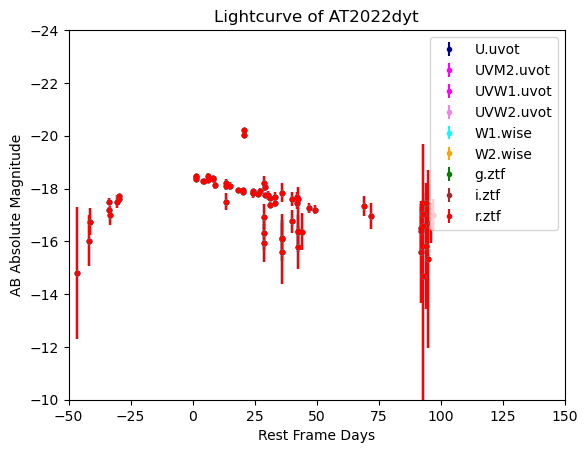

AT2022dyt
[58941.25197920017, 'g.ztf', -5.275161296250306e-07, 6.296731559294736e-06]


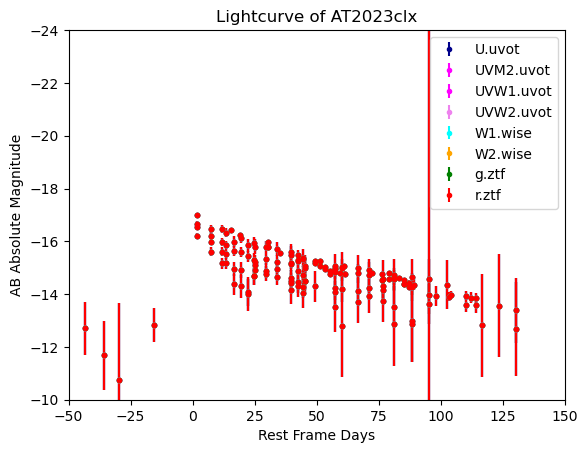

AT2023clx
[59274.380381899886, 'r.ztf', 1.8714509651869434e-05, 1.8043932182176417e-05]


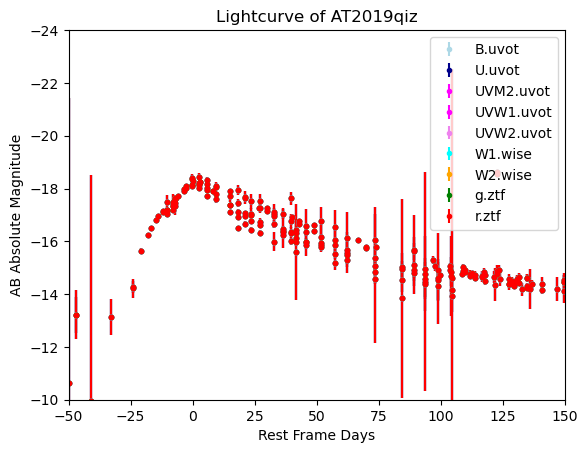

AT2019qiz
[58350.50790510001, 'r.ztf', -4.895405323246608e-06, 1.199971039398226e-05]


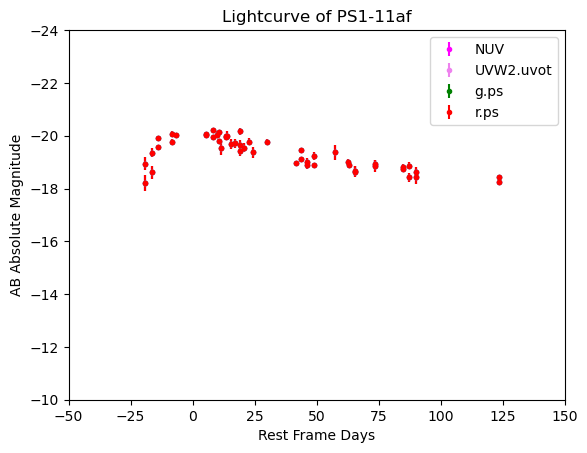

PS1-11af
[55594.295216, 'NUV', 7.60009e-06, 1.8199849270518725e-06]


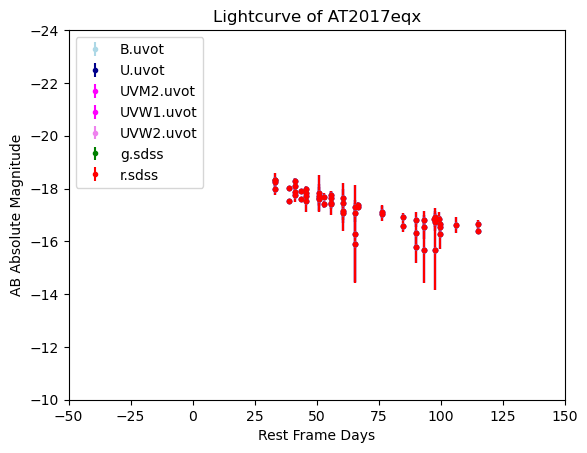

AT2017eqx
[57958.184475, 'UVW2.uvot', 2.558585886905632e-05, 3.0557442634362965e-06]


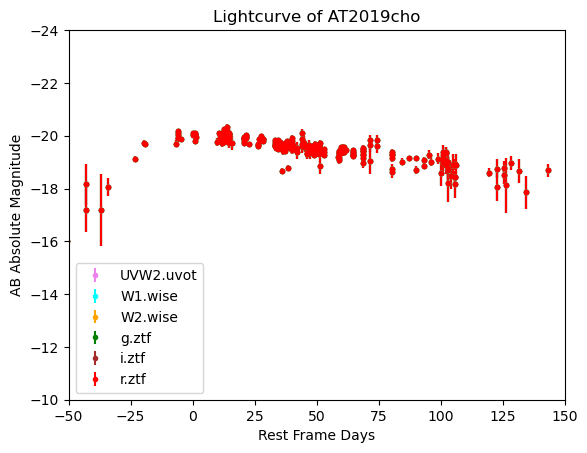

AT2019cho
[58198.4077198999, 'r.ztf', -3.666096706602109e-07, 2.1704841001532843e-06]


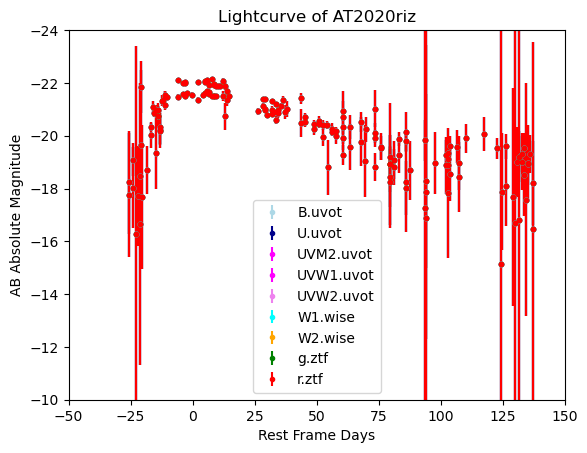

AT2020riz
[58351.448078699876, 'g.ztf', 5.938406978851421e-06, 2.262740825210759e-06]


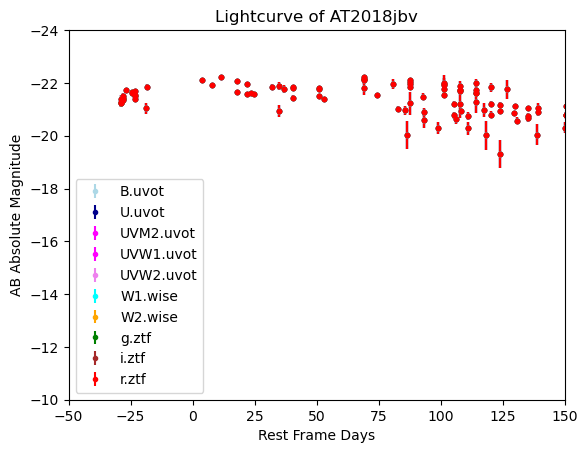

AT2018jbv
[58217.32004630007, 'r.ztf', 2.0594809245149954e-06, 3.4711526353488807e-06]


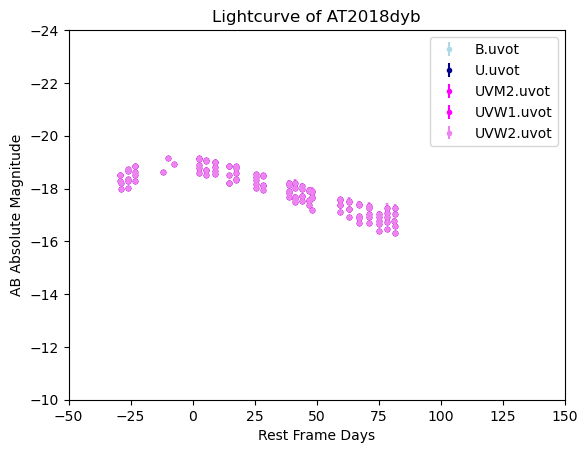

AT2018dyb
[58323.636628, 'UVW2.uvot', 0.0015417004529495553, 6.695519994637357e-05]


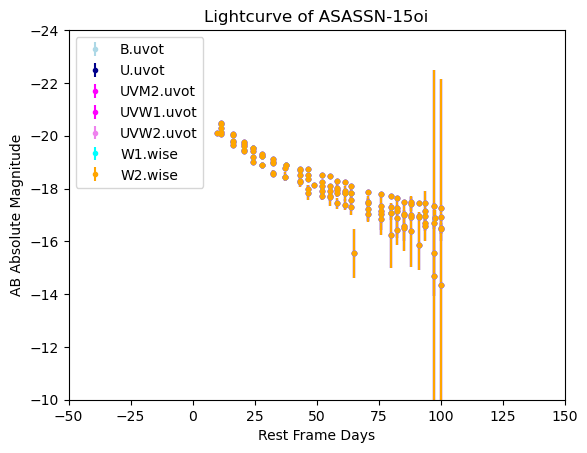

ASASSN-15oi
[57264.419466, 'UVW2.uvot', 0.0006668067692136191, 2.8959050036520986e-05]


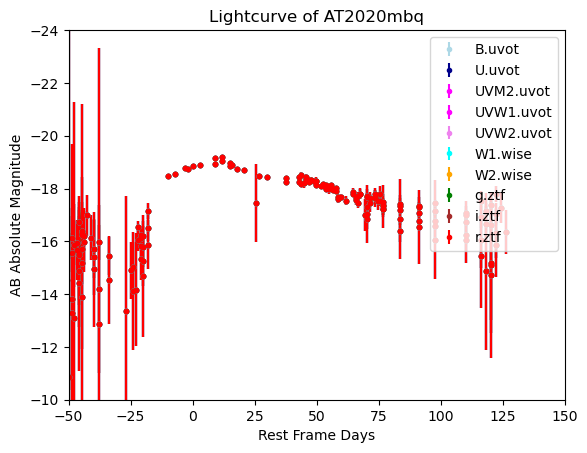

AT2020mbq
[58294.270659700036, 'r.ztf', 1.8803477886357962e-06, 5.128344568525613e-06]


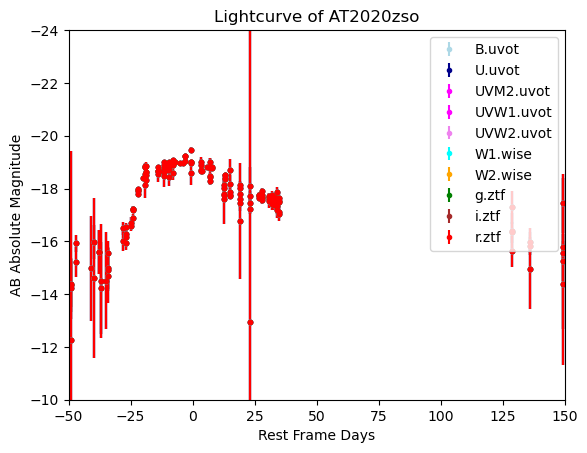

AT2020zso
[58472.127419000026, 'g.ztf', 1.3159318824549471e-05, 1.1044817022448602e-05]


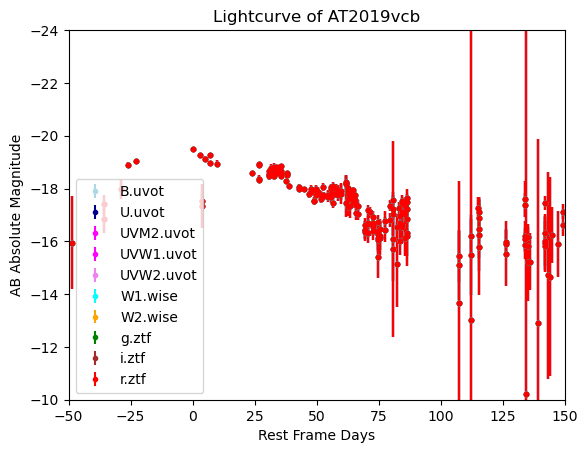

AT2019vcb
[58205.30312500009, 'g.ztf', 7.823553703256624e-07, 7.333173103570656e-06]


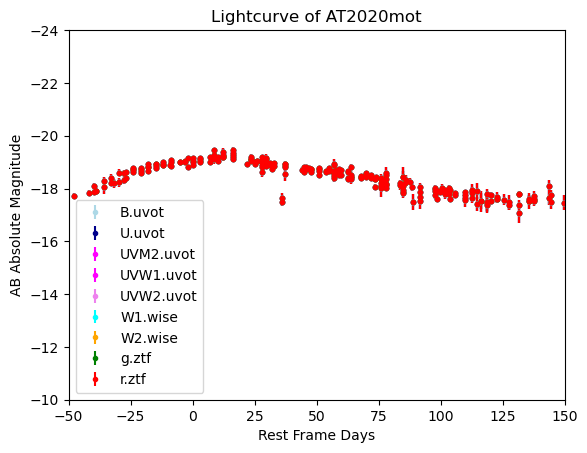

AT2020mot
[58641.42275460018, 'g.ztf', -1.6348780323674172e-06, 3.49287333890613e-06]


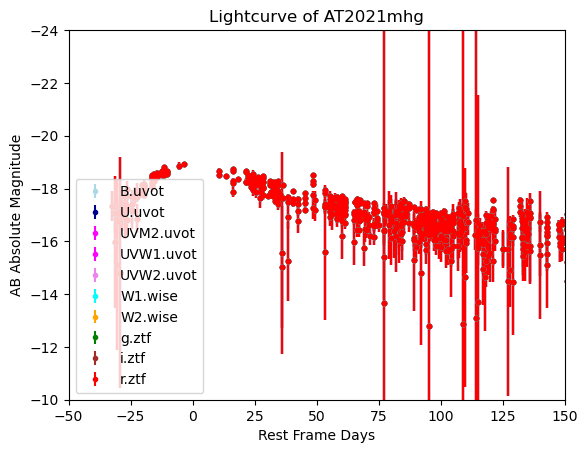

AT2021mhg
[58644.44856479997, 'g.ztf', -2.239343123948549e-06, 4.9036298056647264e-06]


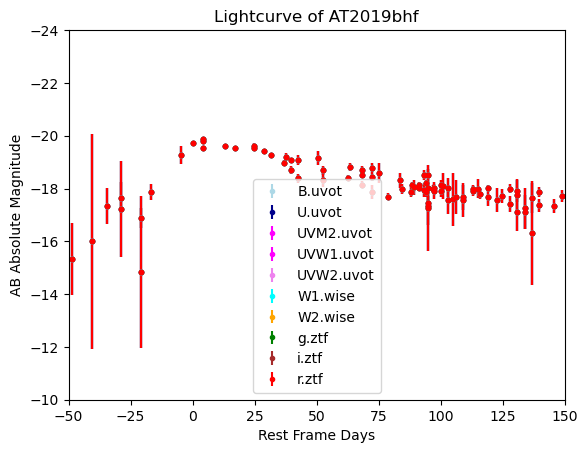

AT2019bhf
[58206.40856479993, 'g.ztf', -2.2769776371715907e-06, 6.429515619185677e-06]


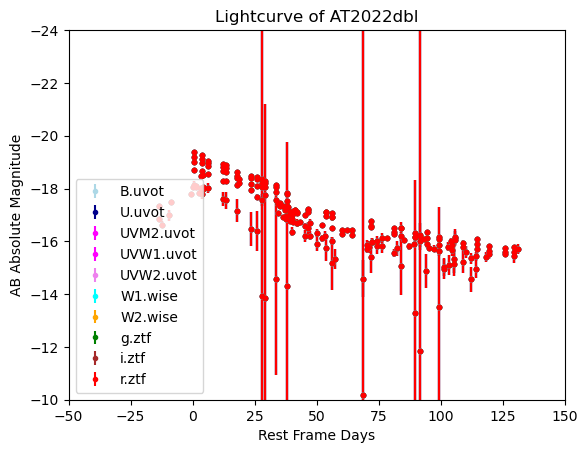

AT2022dbl
[58908.34869210003, 'g.ztf', -1.2605951450681338e-06, 4.2051987247961746e-06]


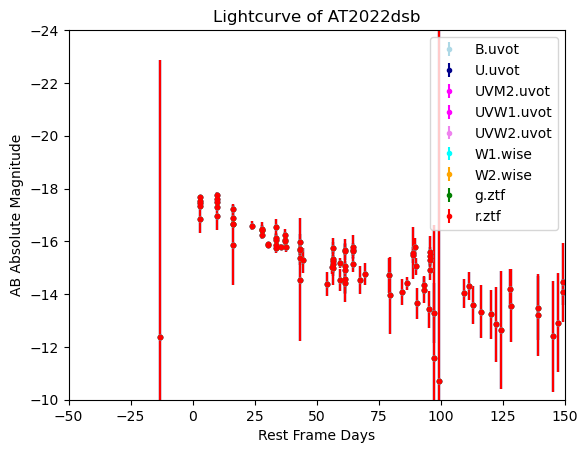

AT2022dsb
[58941.41781250015, 'r.ztf', 4.747932852571361e-06, 1.247779148454686e-05]


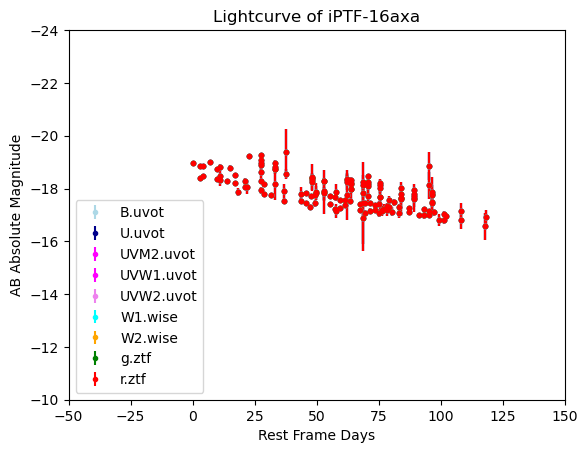

iPTF-16axa
[57556.857266, 'UVW2.uvot', 6.486344335482348e-05, 5.633967105248797e-06]


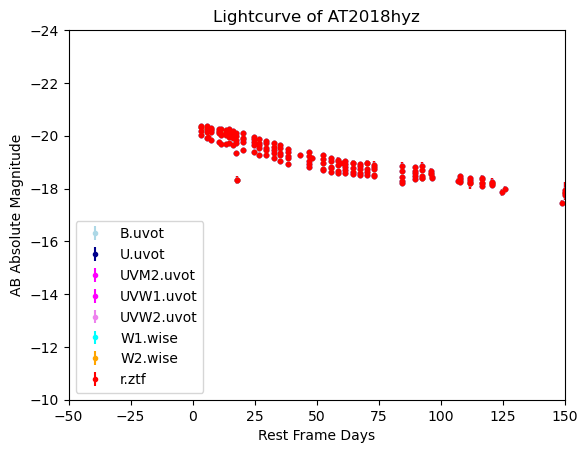

AT2018hyz
[58436.420202, 'UVW2.uvot', 0.0007870457896950936, 3.418096434697663e-05]


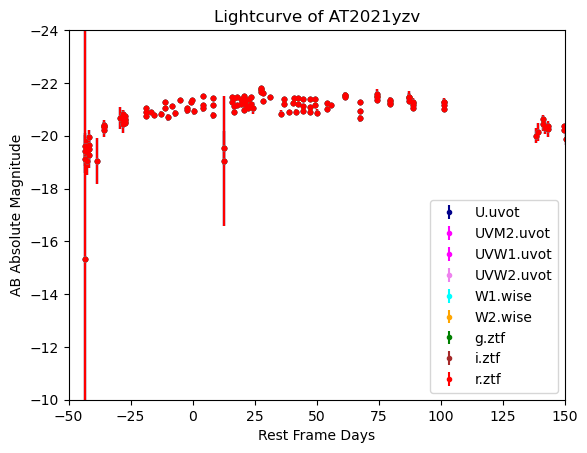

AT2021yzv
[58756.50755790016, 'r.ztf', -2.2053204232931322e-06, 2.92032176543055e-06]


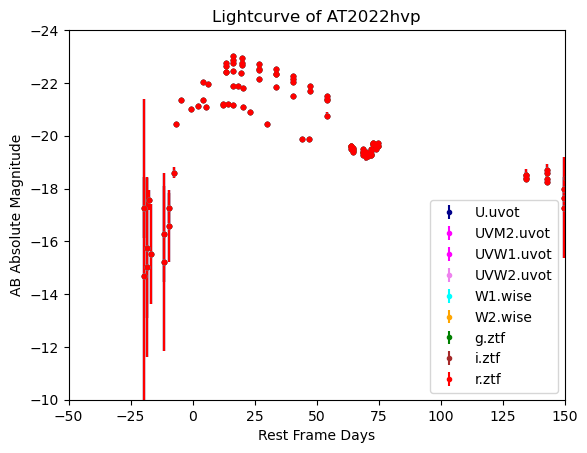

AT2022hvp
[58965.20043980004, 'g.ztf', 3.7762282658209684e-06, 2.446054318630674e-06]


In [153]:
def plot_lightcurve(tde_name):
    with open("/Users/snorris/manyTDE/data/sources/{}.json".format(tde_name)) as f:
        tde_data = json.load(f)
    flux_filter = []
    mag_filter = []
    absMag_filter = []
    error_filter = []
    flux_error_filter = []
    mag_error_filter = []
    mjd_date_filter = []
    peak_date_filter = []
    rest_time_filter = []
    lc_filters = tde_data['lightcurve']['filters']
    for i in range (len(tde_data['lightcurve']["data"])):
        peak_year = tde_data.get('peak_mjd')
        flux_filter.append(tde_data['lightcurve']["data"][i][2])
        error_filter.append(tde_data['lightcurve']["data"][i][3])
        mjd_date_filter.append(tde_data['lightcurve']["data"][i][0])
        distance = (sol*tde_data.get('z'))/Ho         
    distance_pc = distance.to(u.pc)
    distance_mod = (5*np.log10(distance_pc/(10*u.pc)))
    flux_filter = u.Jy*np.array(flux_filter)
    mag_filter = u.Magnitude(flux_filter.to(u.AB))     
    absMag_filter = mag_filter.value - distance_mod
    flux_error_filter = u.Jy * np.array(error_filter)
    mjd_date_filter= np.array(mjd_date_filter)
    peak_date_filter = mjd_date_filter - peak_year
    rest_time_filter = peak_date_filter*np.sqrt(1-tde_data.get('z')**2)
    mag_error_filter = np.sqrt((2.5/np.log(10))*(flux_error_filter/flux_filter)**2) 
    for element in lc_filters: 
        lightcurve = plt.errorbar(rest_time_filter,absMag_filter,yerr = mag_error_filter,fmt='.',label= element, c = lc_color_dict[element])
        plt.gca().invert_yaxis()
        plt.xlim(-50,150)
        plt.ylim(-10,-24)
        plt.legend()
        plt.xlabel("Rest Frame Days")
        plt.ylabel("AB Absolute Magnitude")
        plt.legend()
        plt.title("Lightcurve of {}".format(tde_name))
    plt.show()
    return(print(tde_name),print(tde_data['lightcurve']['data'][:][2]),lightcurve)
for json_file in json_list:
    tde_name = json_file[:-5]
    plot_lightcurve(tde_name) 
#plot_lightcurve(json_list[60].replace('.json',''))

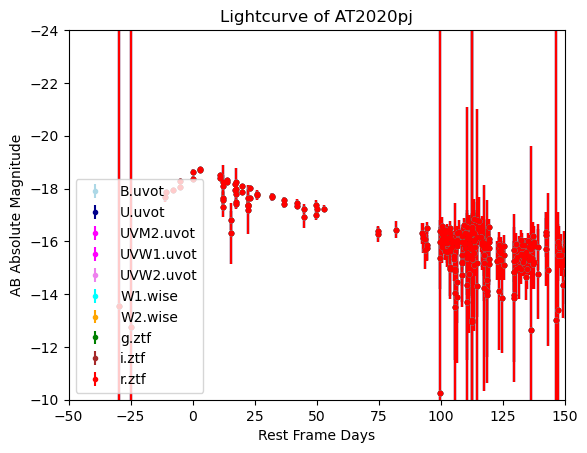

AT2020pj


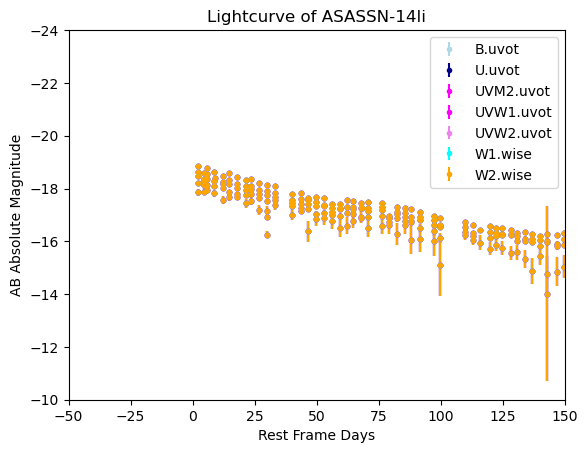

ASASSN-14li


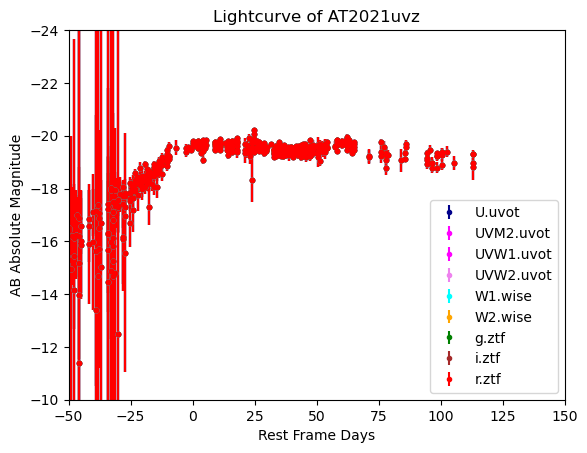

AT2021uvz


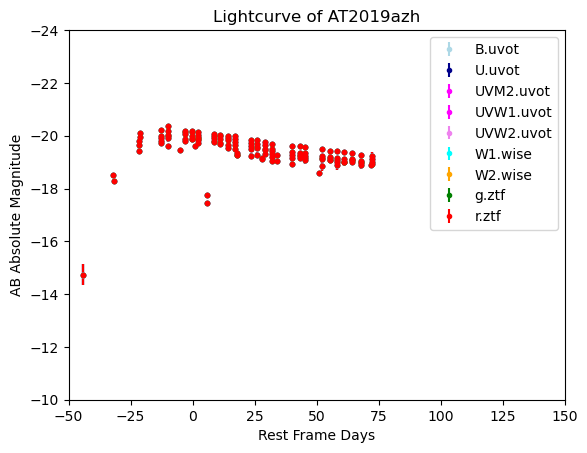

AT2019azh


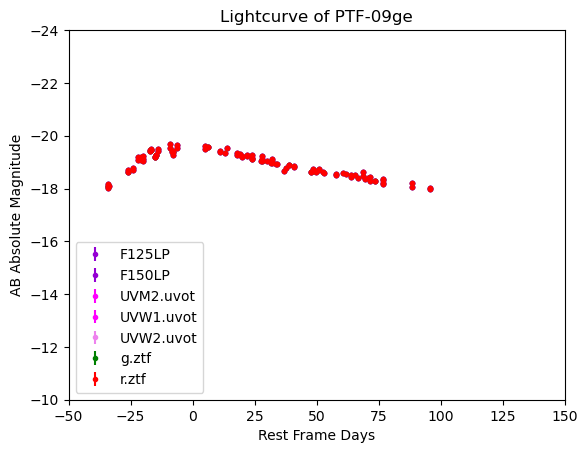

PTF-09ge


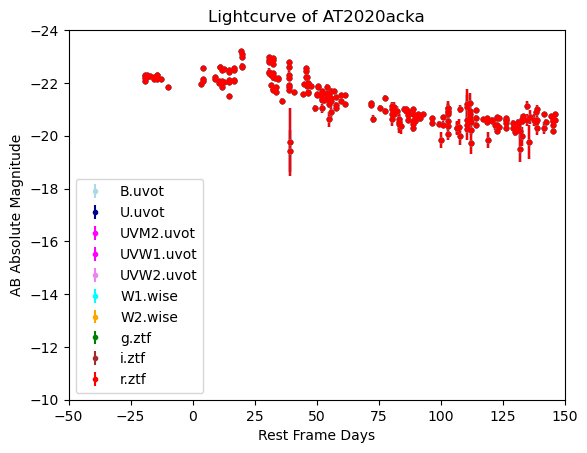

AT2020acka


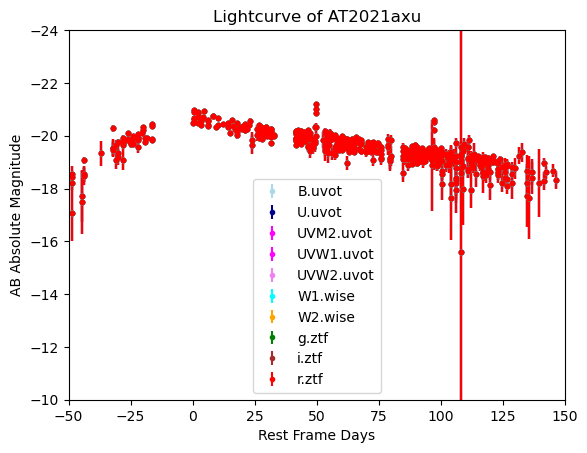

AT2021axu


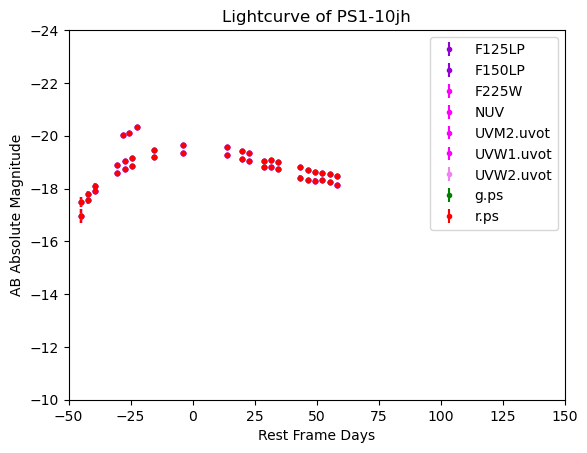

PS1-10jh


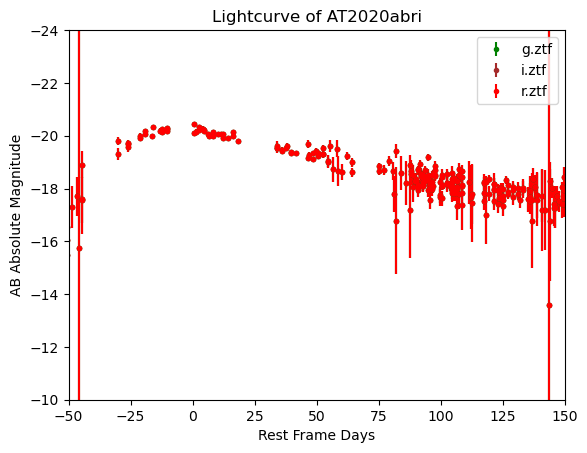

AT2020abri


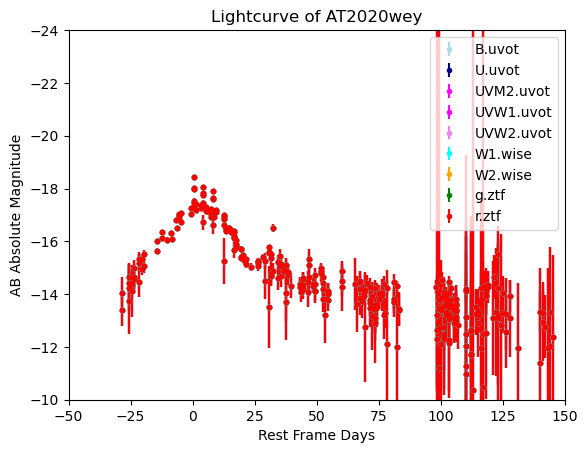

AT2020wey


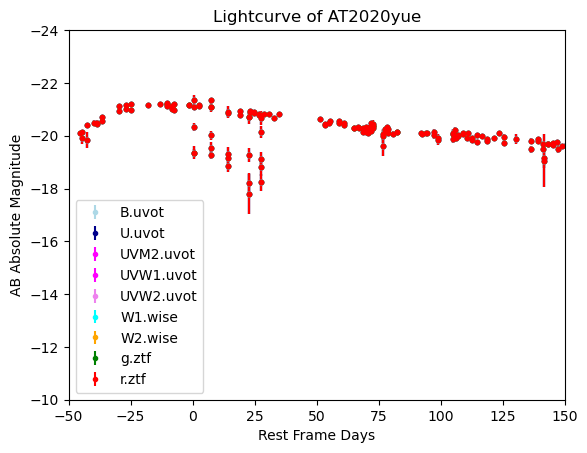

AT2020yue


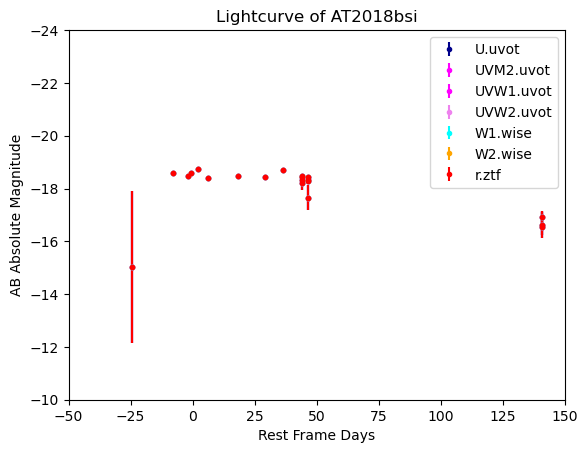

AT2018bsi


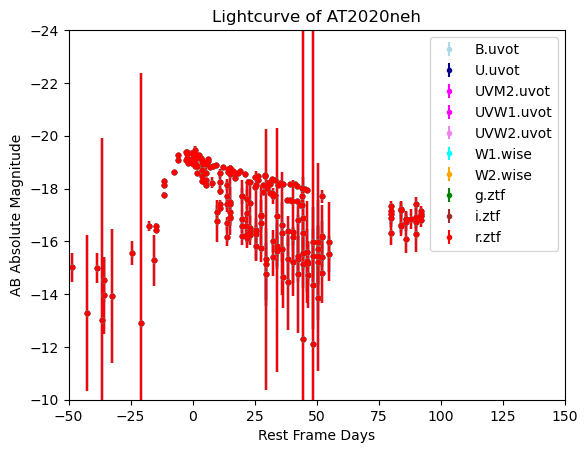

AT2020neh


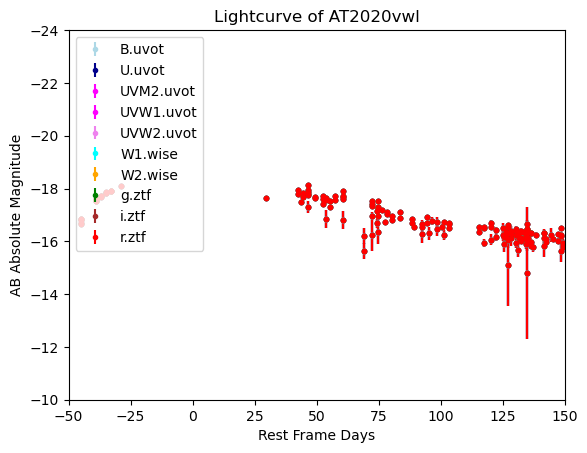

AT2020vwl


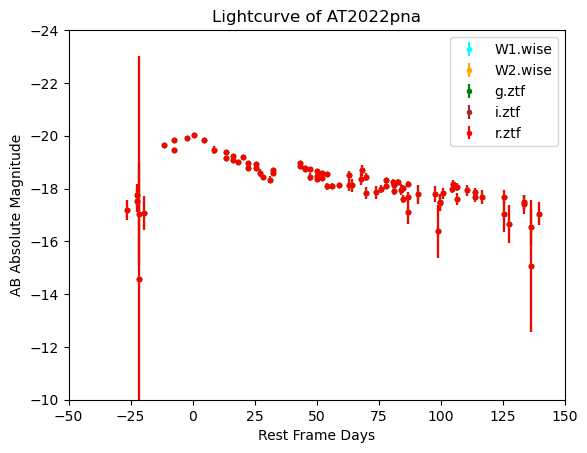

AT2022pna


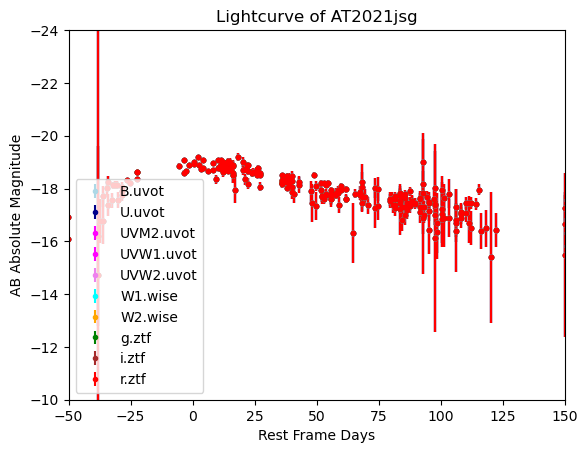

AT2021jsg


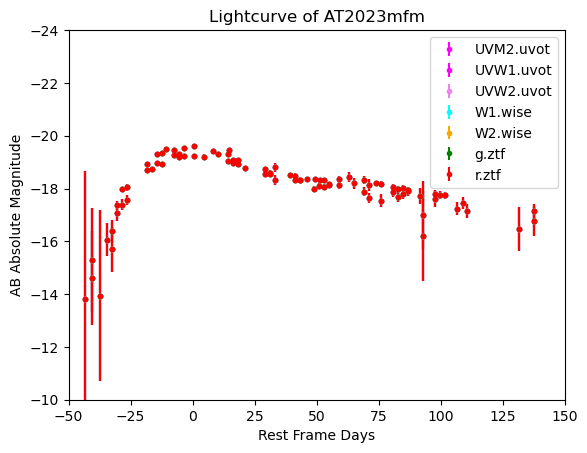

AT2023mfm


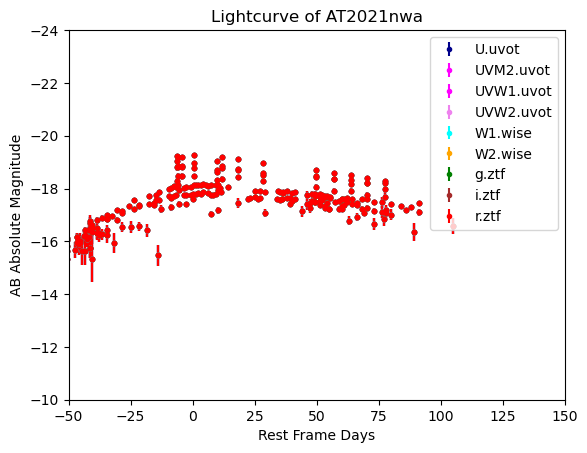

AT2021nwa


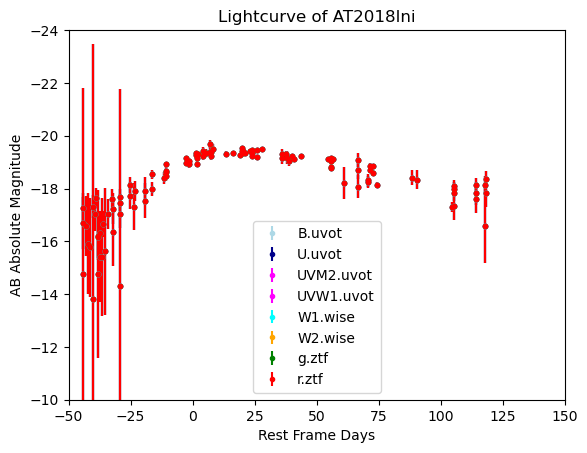

AT2018lni


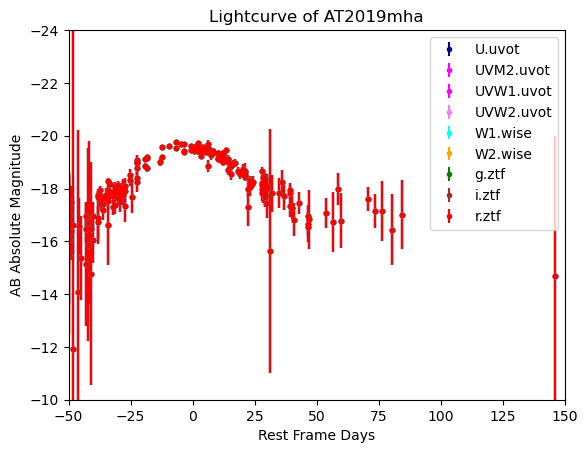

AT2019mha


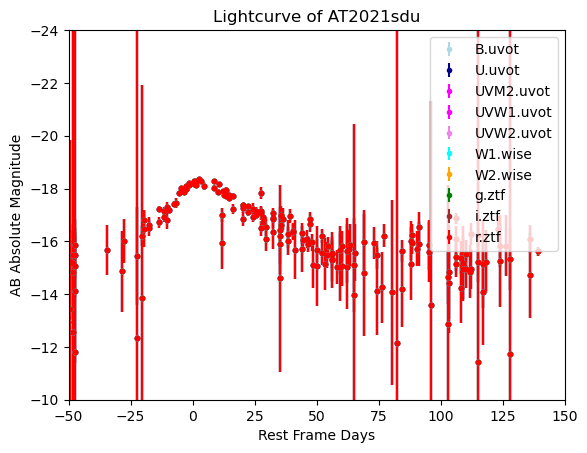

AT2021sdu


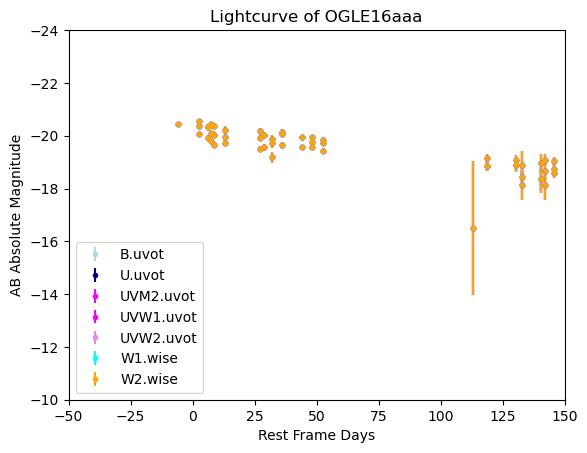

OGLE16aaa


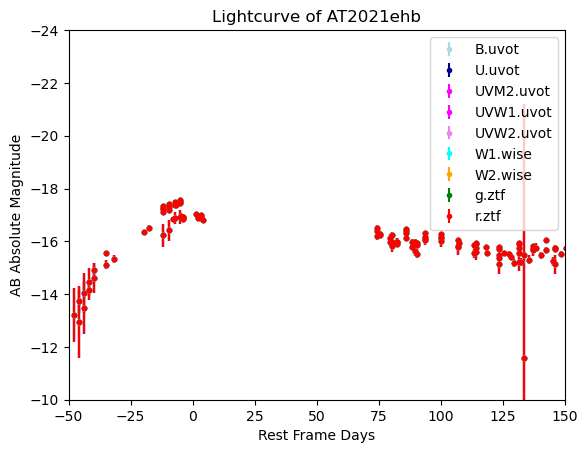

AT2021ehb


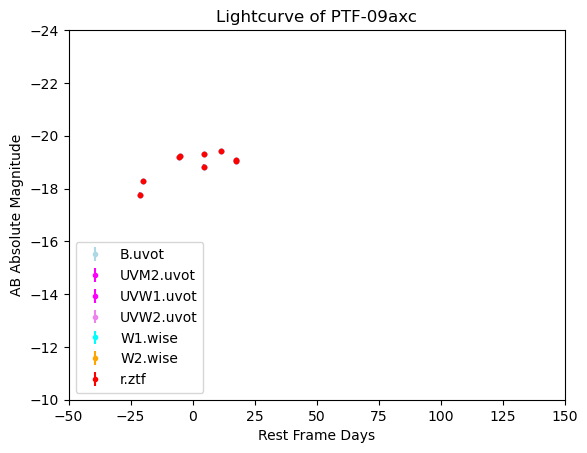

PTF-09axc


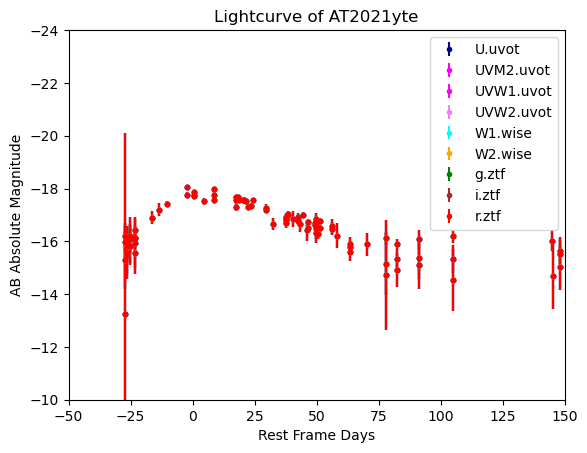

AT2021yte


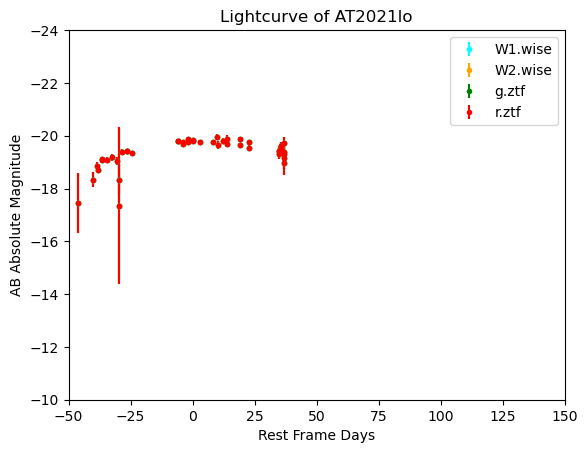

AT2021lo


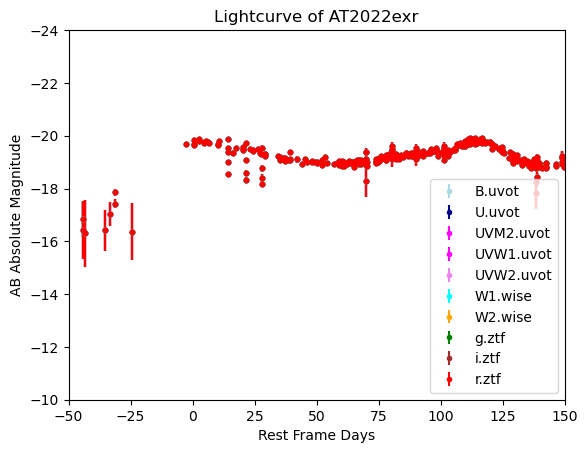

AT2022exr


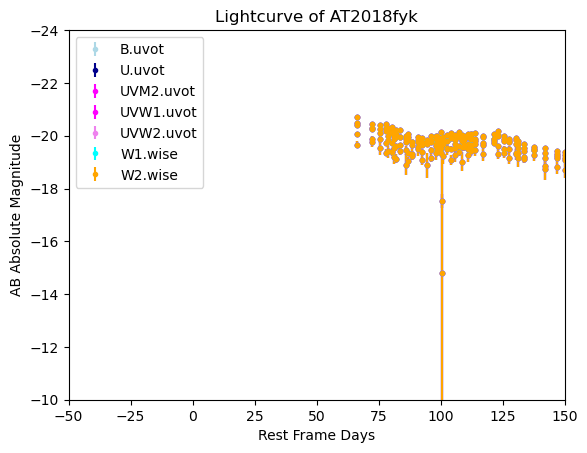

AT2018fyk


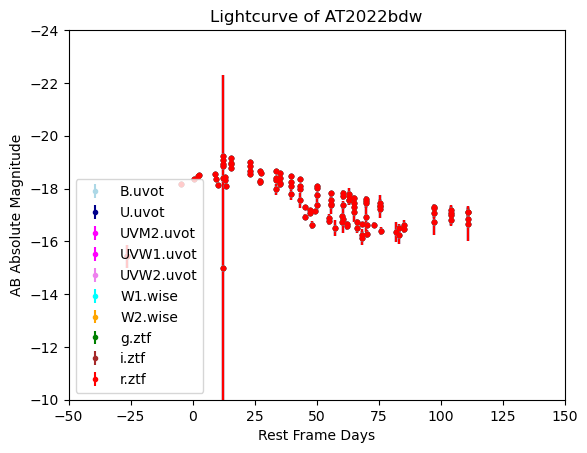

AT2022bdw


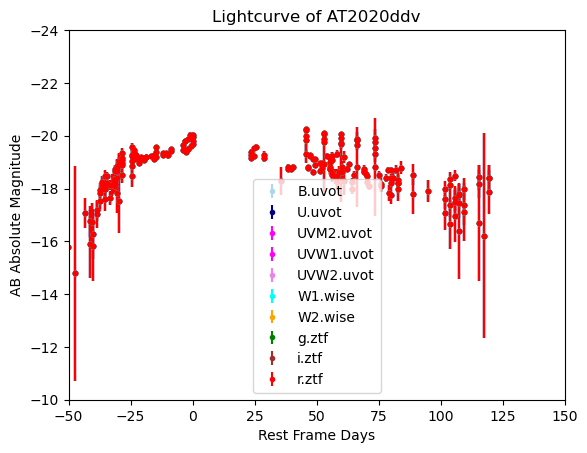

AT2020ddv


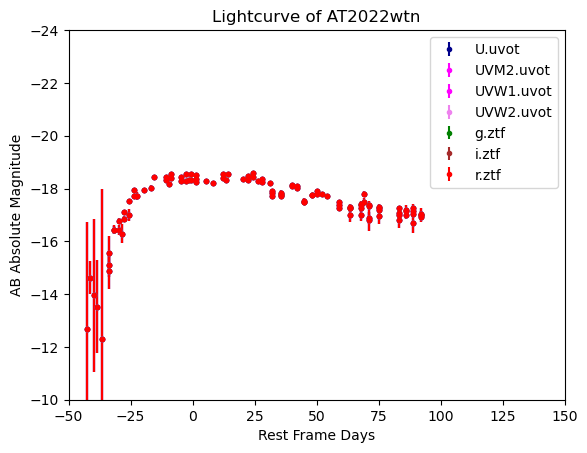

AT2022wtn


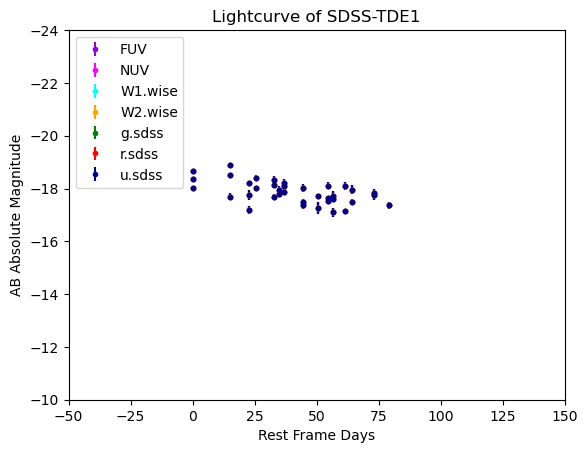

SDSS-TDE1


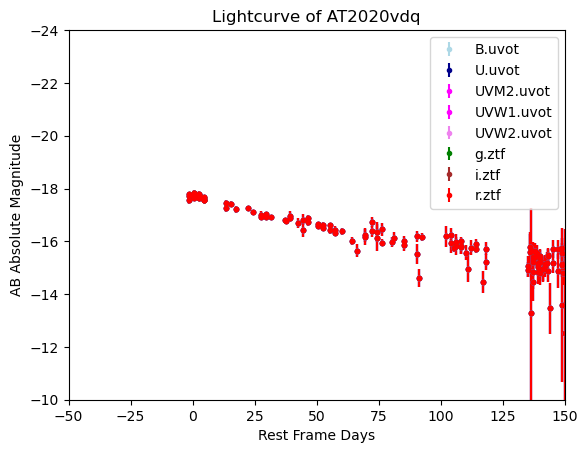

AT2020vdq


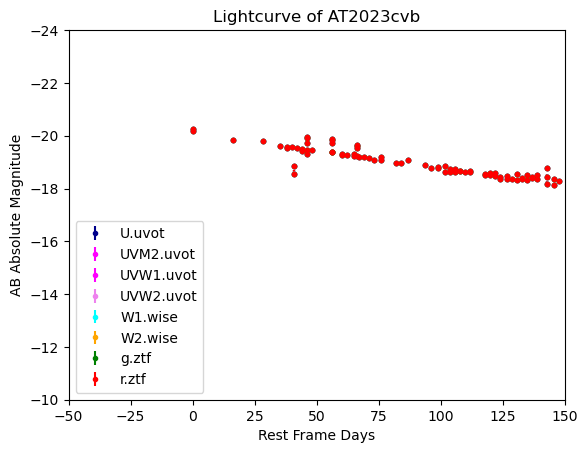

AT2023cvb


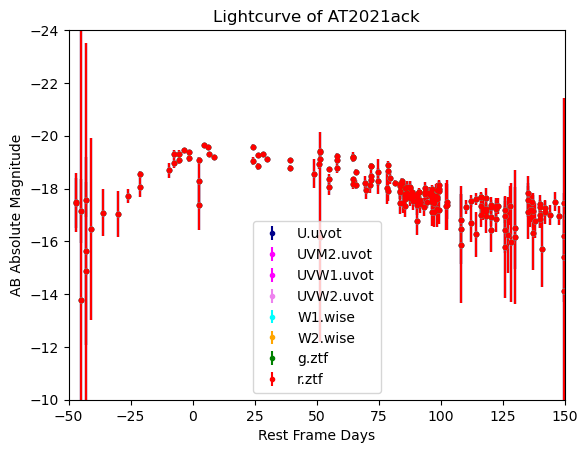

AT2021ack


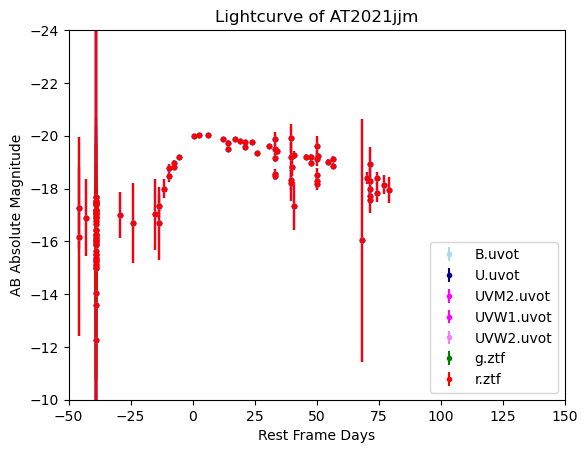

AT2021jjm


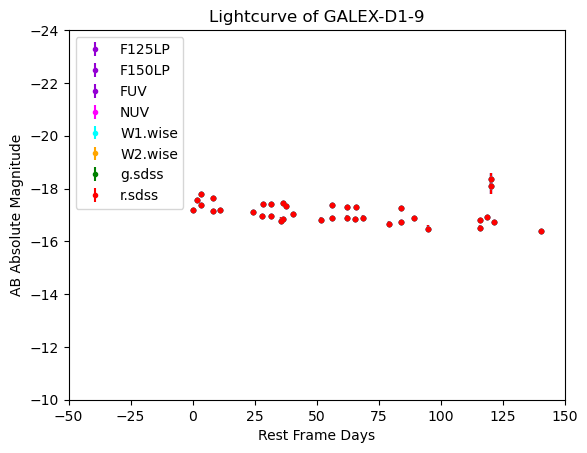

GALEX-D1-9


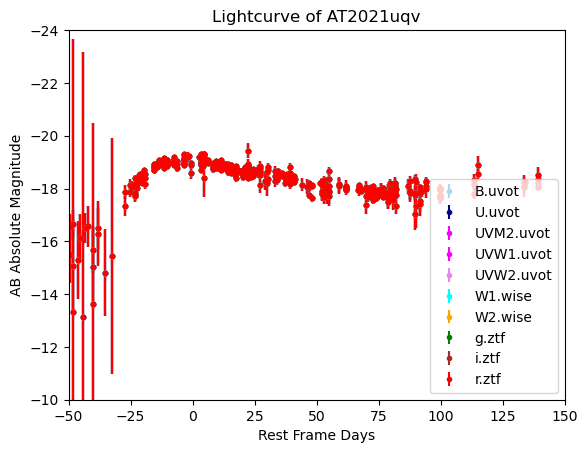

AT2021uqv


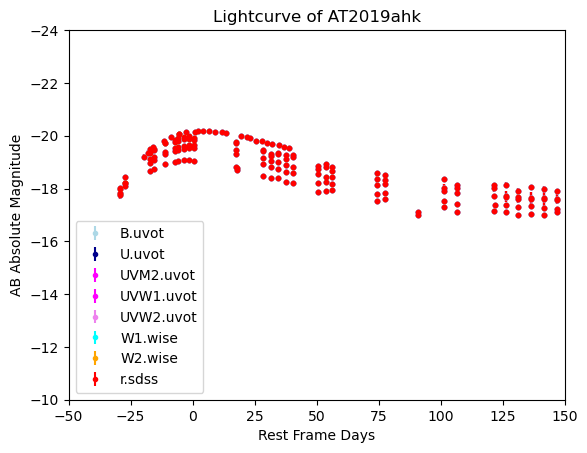

AT2019ahk


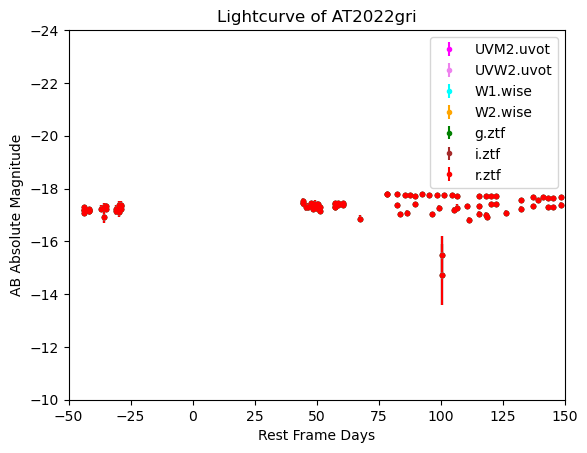

AT2022gri


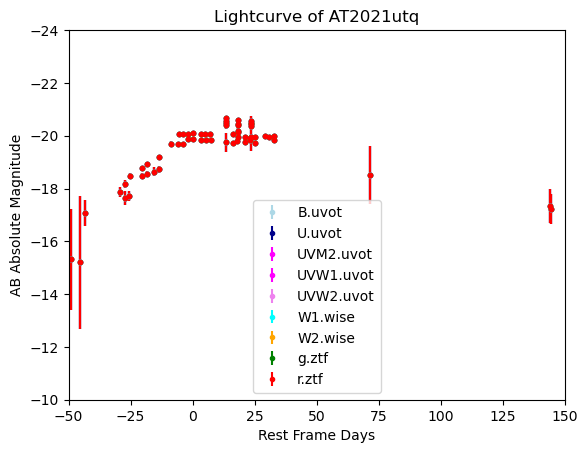

AT2021utq


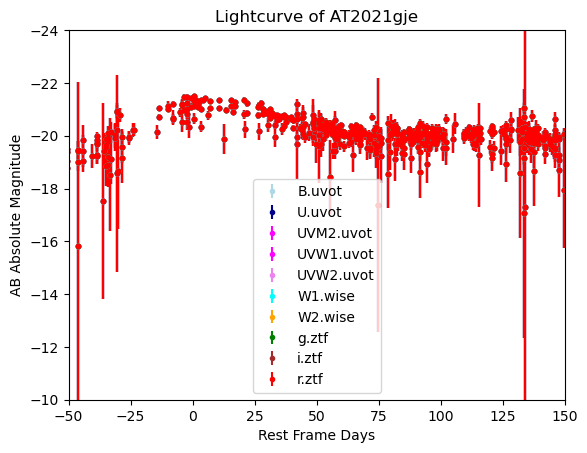

AT2021gje


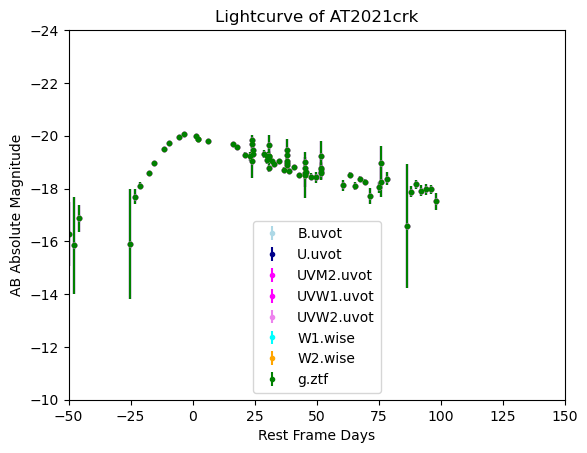

AT2021crk


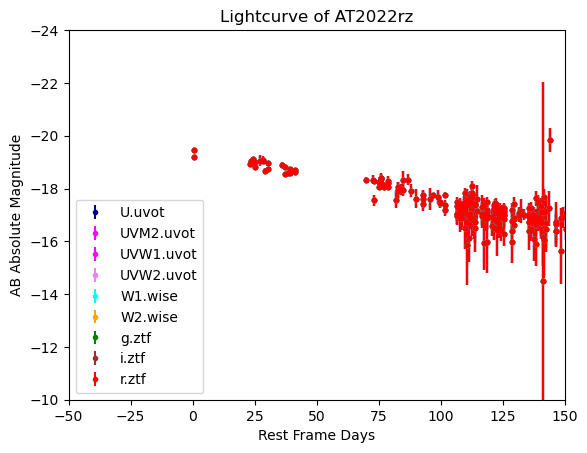

AT2022rz


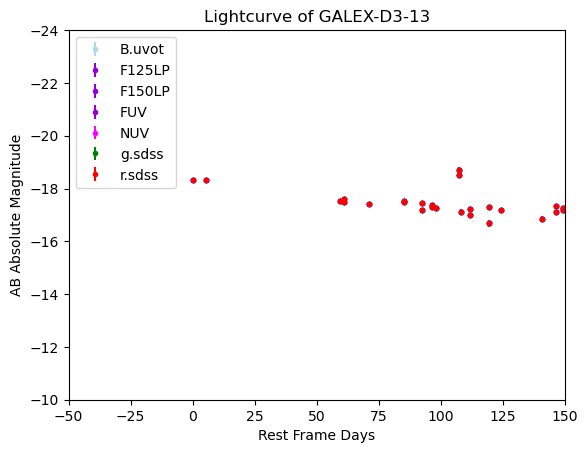

GALEX-D3-13


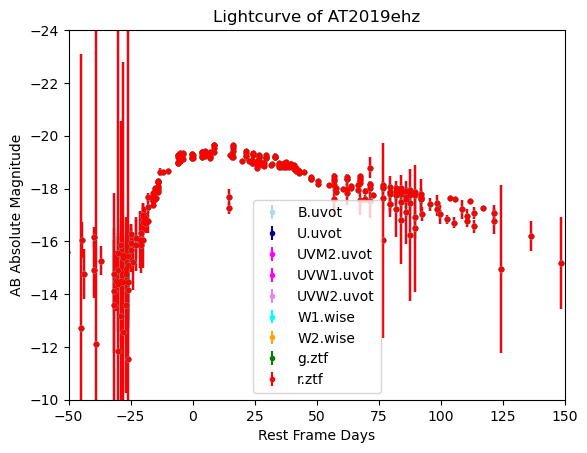

AT2019ehz


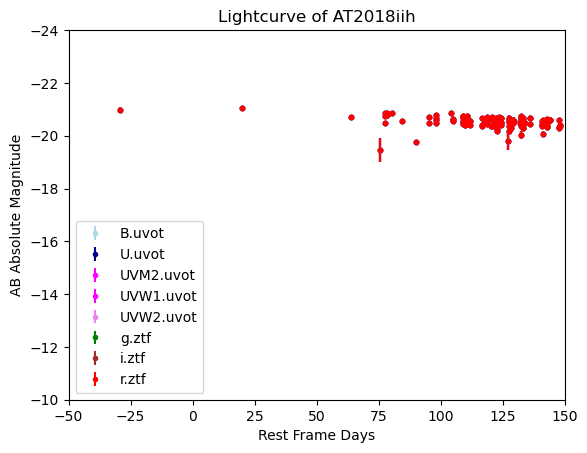

AT2018iih


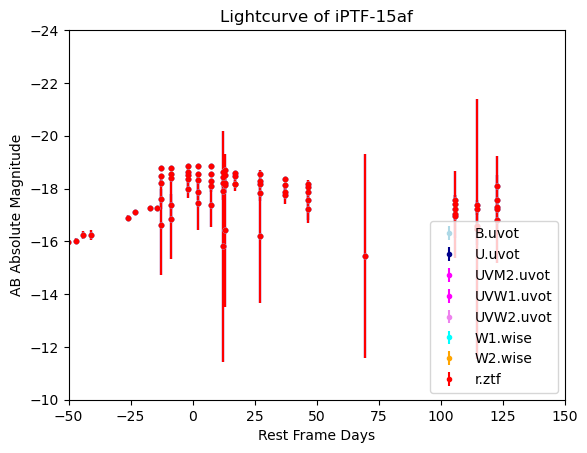

iPTF-15af


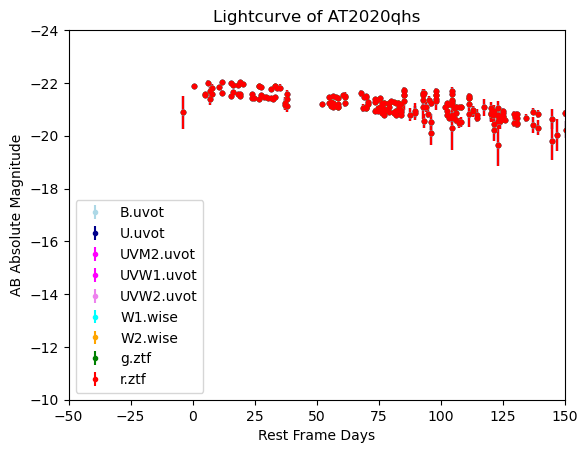

AT2020qhs


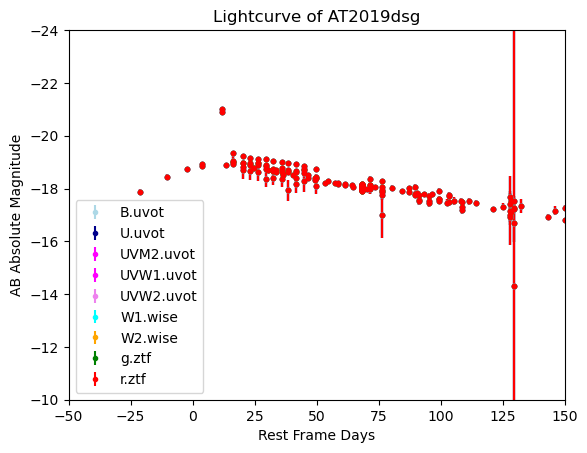

AT2019dsg


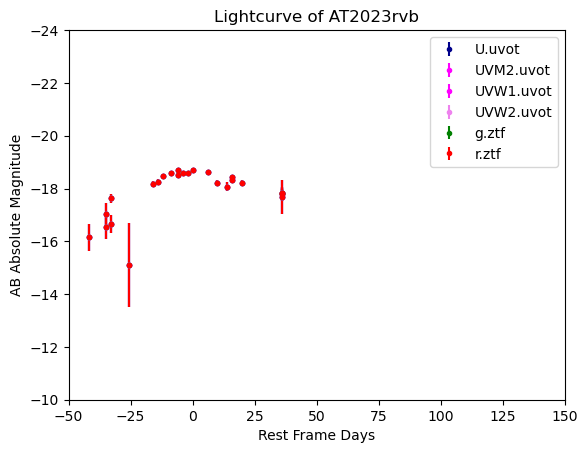

AT2023rvb


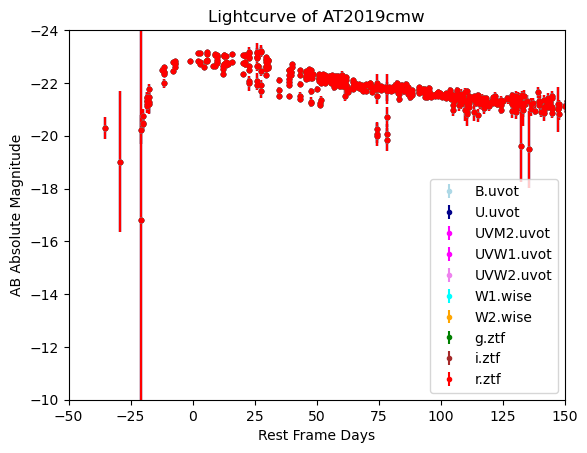

AT2019cmw


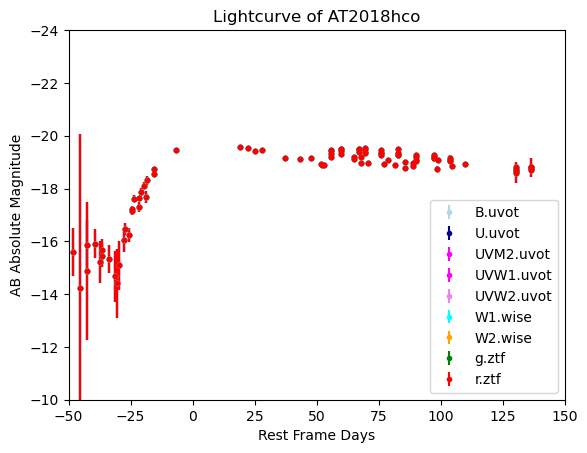

AT2018hco


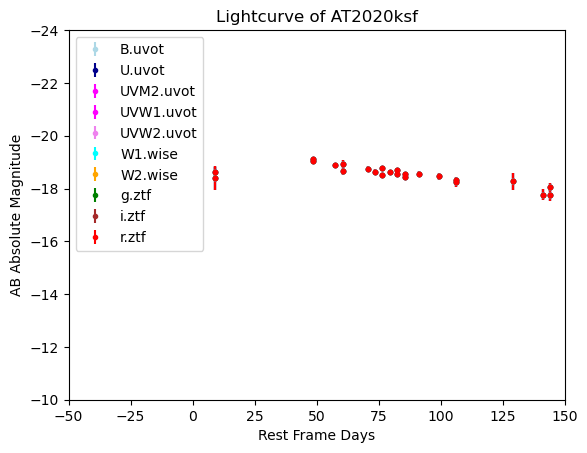

AT2020ksf


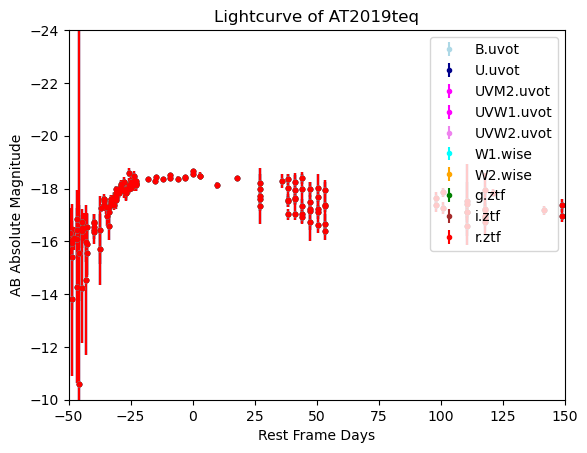

AT2019teq


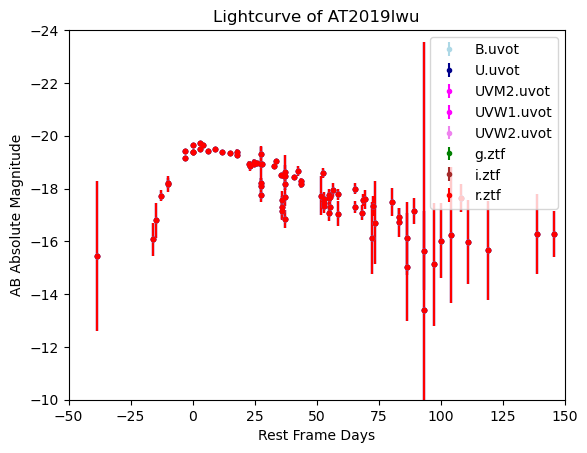

AT2019lwu


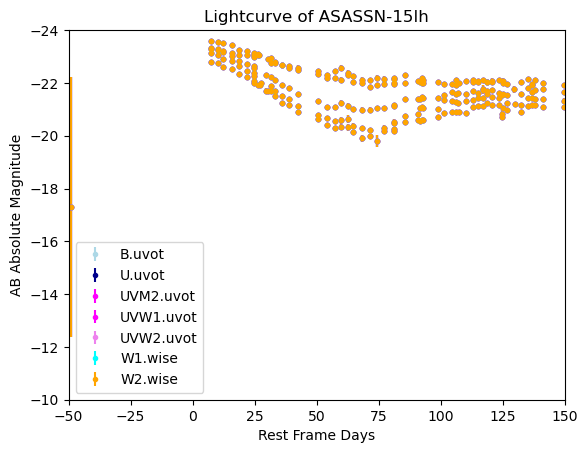

ASASSN-15lh


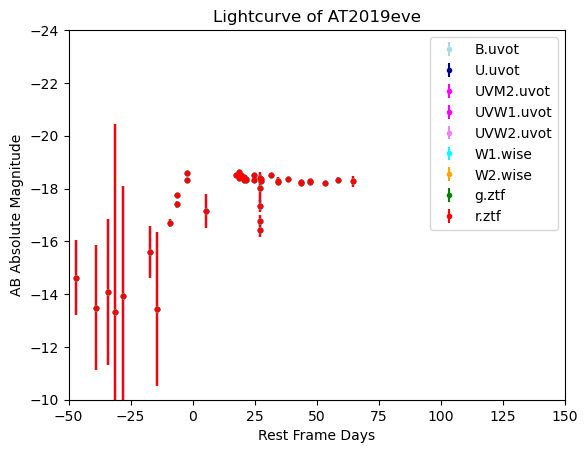

AT2019eve


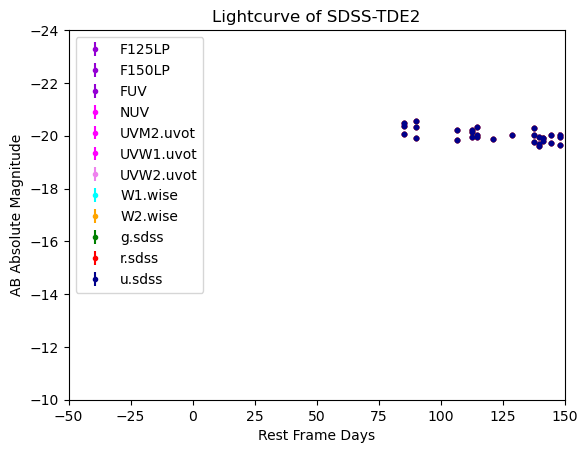

SDSS-TDE2


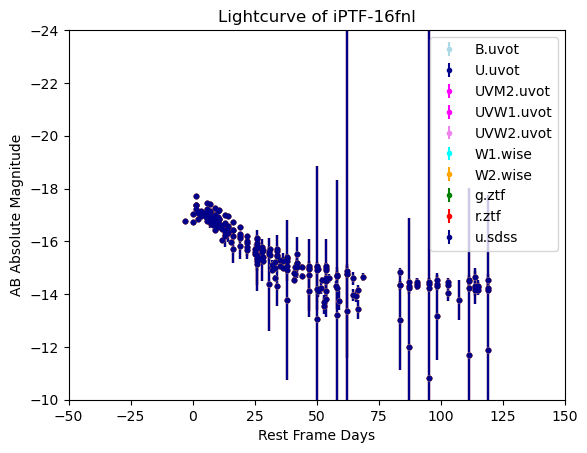

iPTF-16fnl


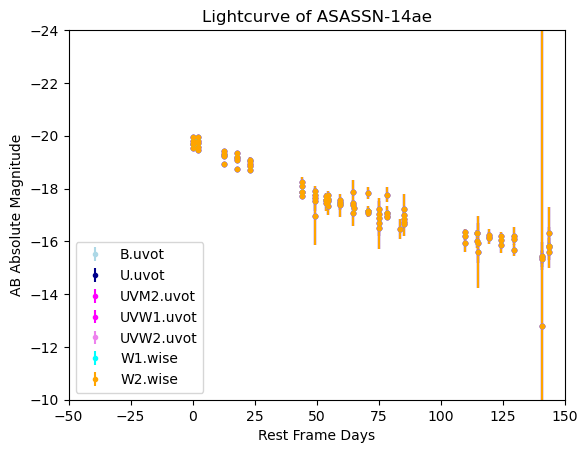

ASASSN-14ae


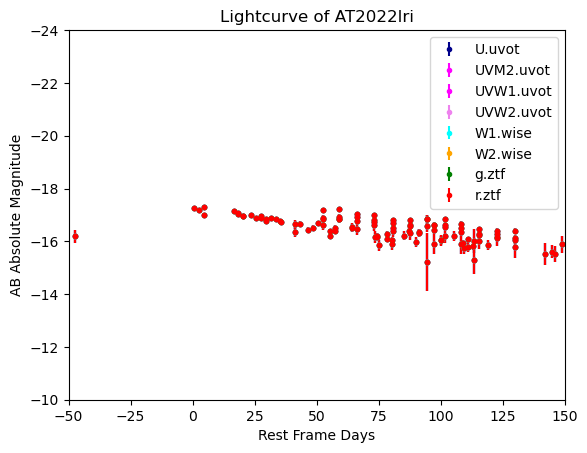

AT2022lri


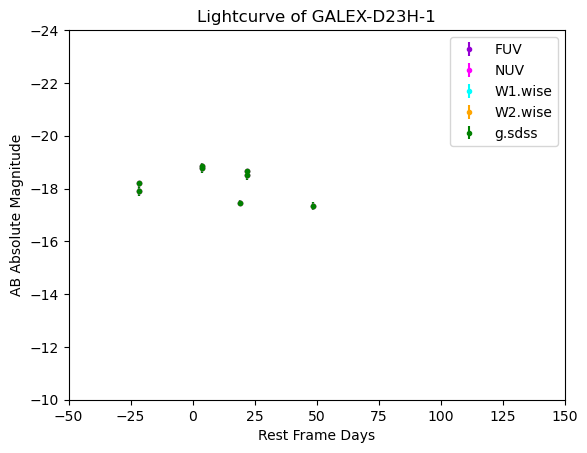

GALEX-D23H-1


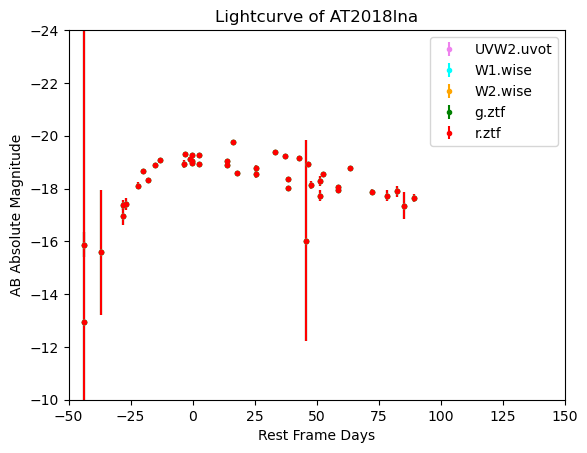

AT2018lna


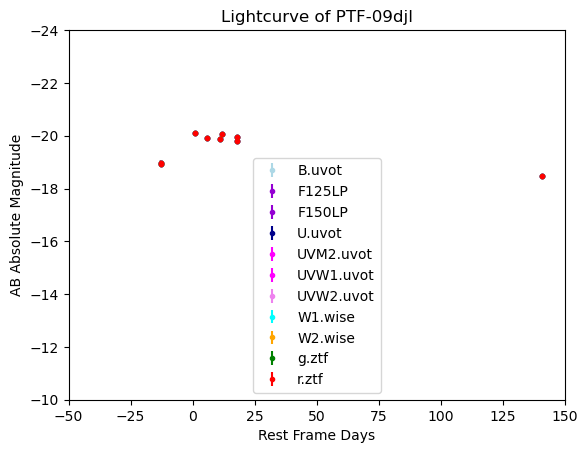

PTF-09djl


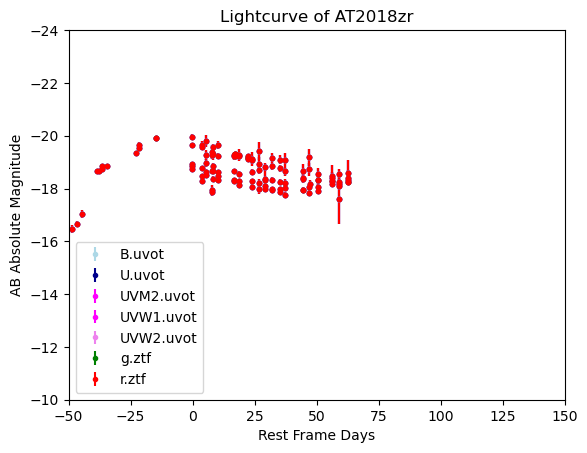

AT2018zr


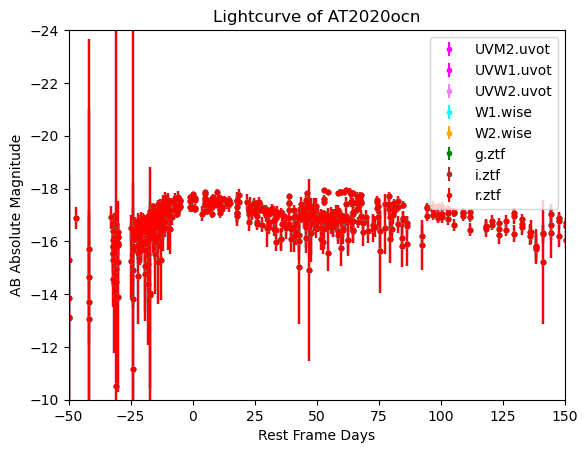

AT2020ocn


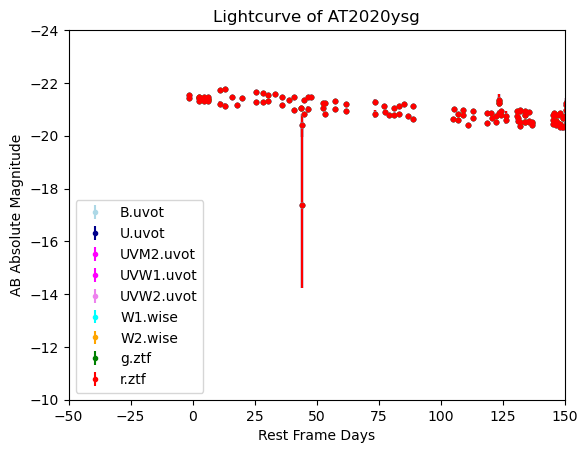

AT2020ysg


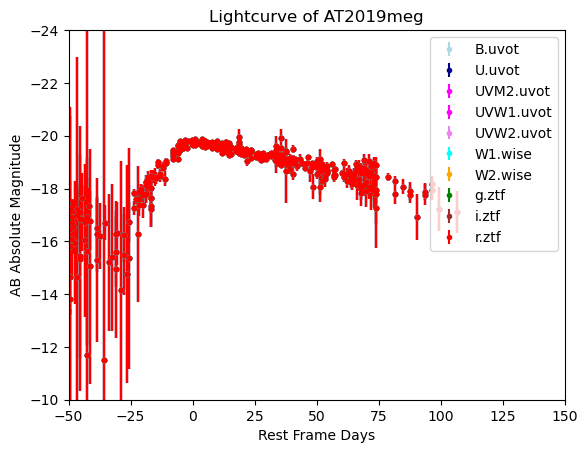

AT2019meg


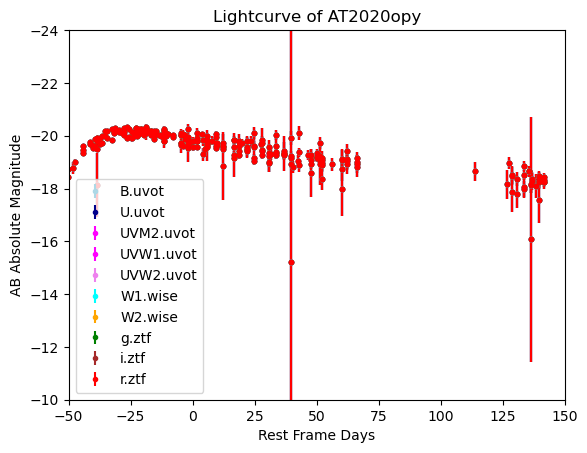

AT2020opy


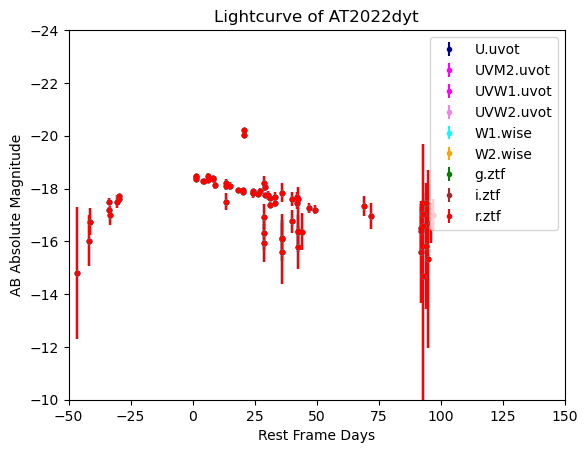

AT2022dyt


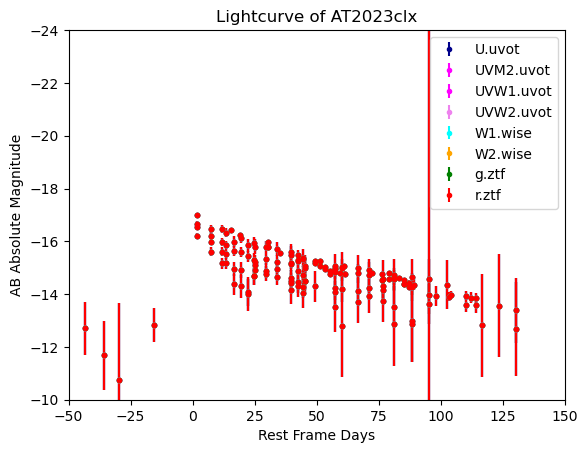

AT2023clx


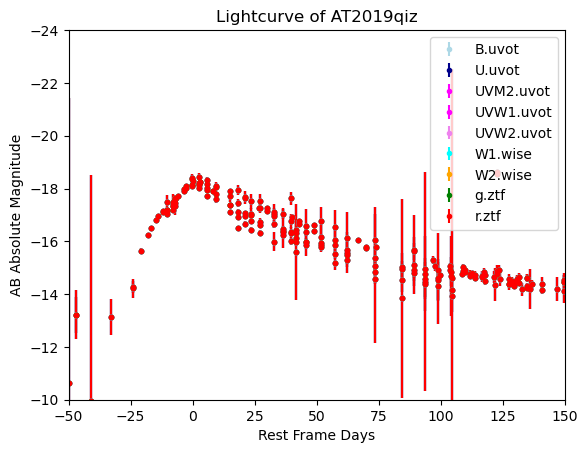

AT2019qiz


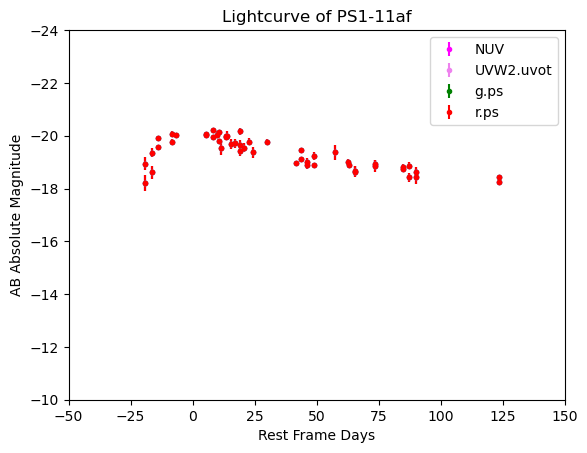

PS1-11af


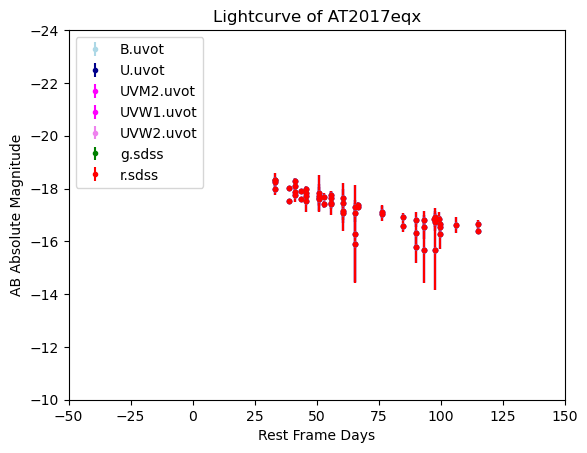

AT2017eqx


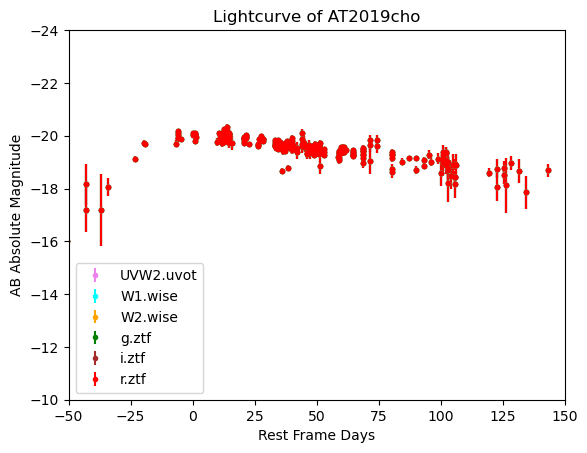

AT2019cho


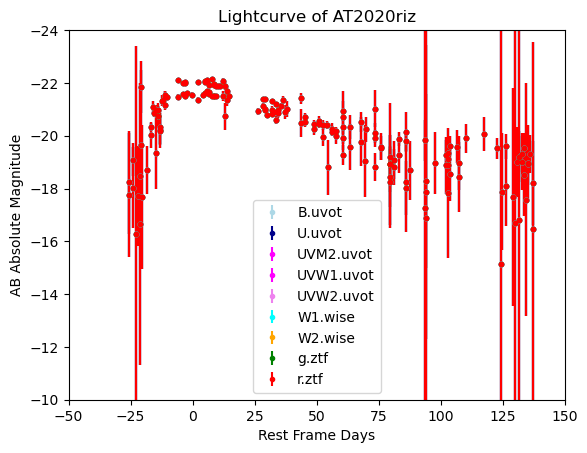

AT2020riz


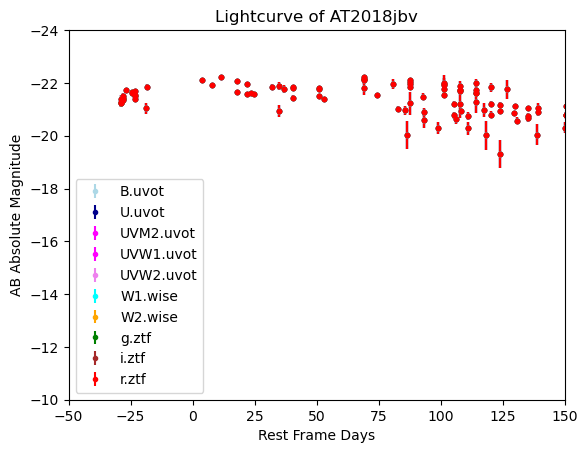

AT2018jbv


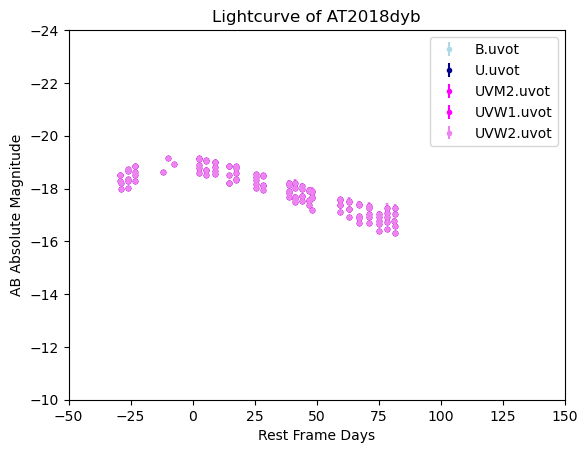

AT2018dyb


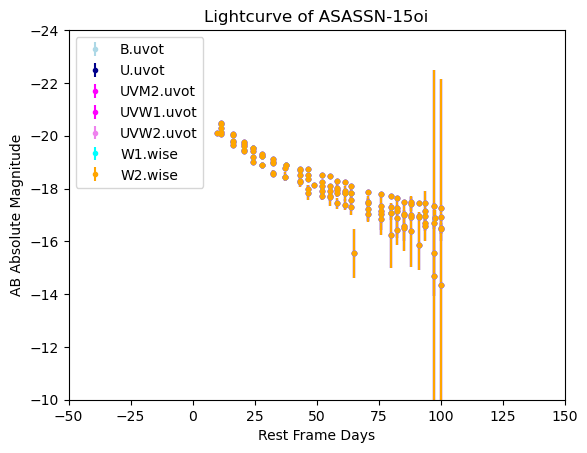

ASASSN-15oi


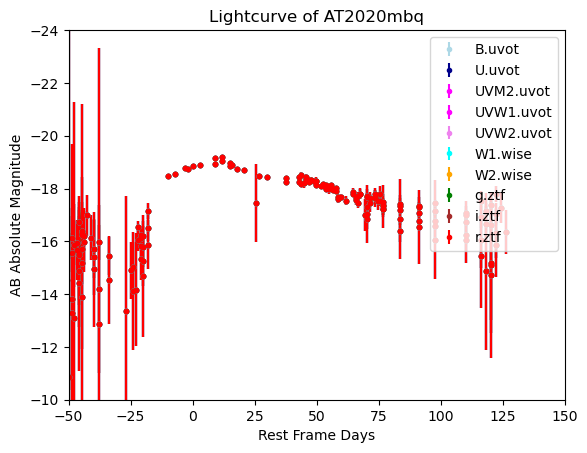

AT2020mbq


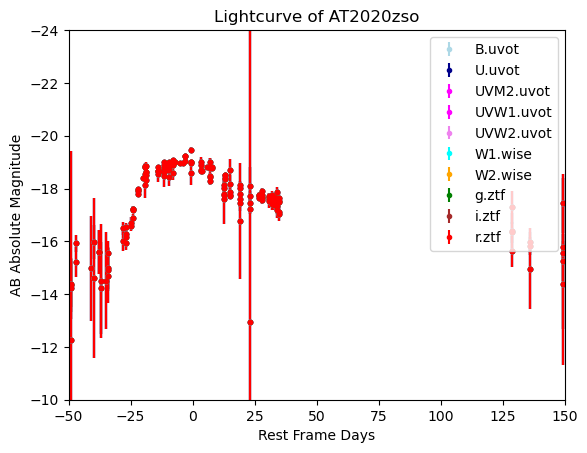

AT2020zso


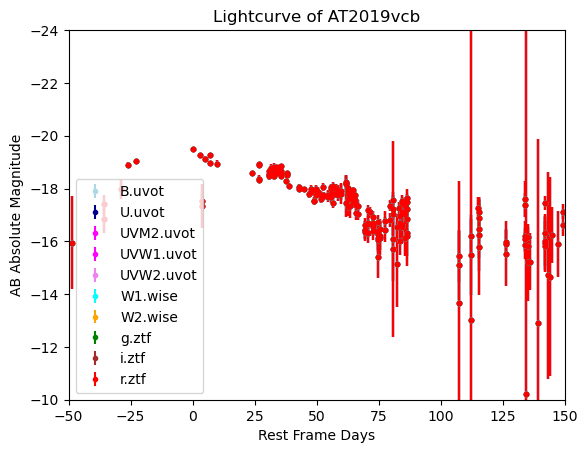

AT2019vcb


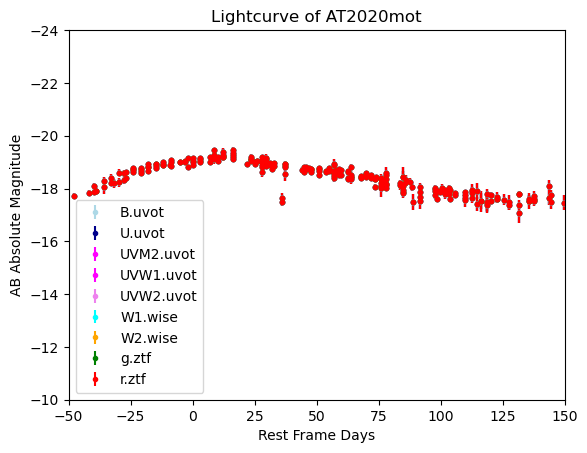

AT2020mot


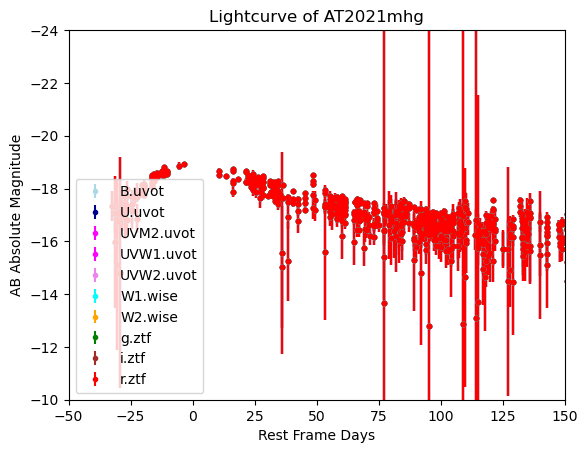

AT2021mhg


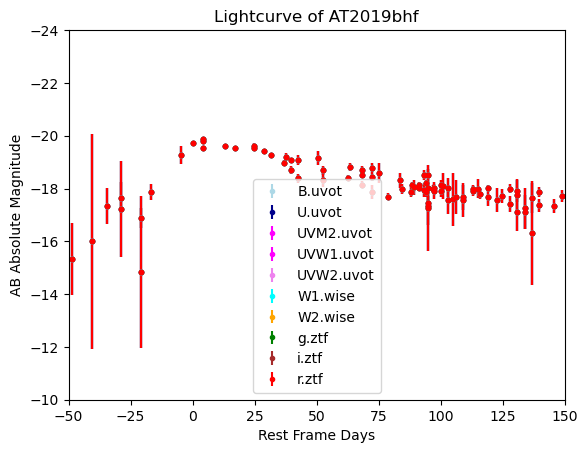

AT2019bhf


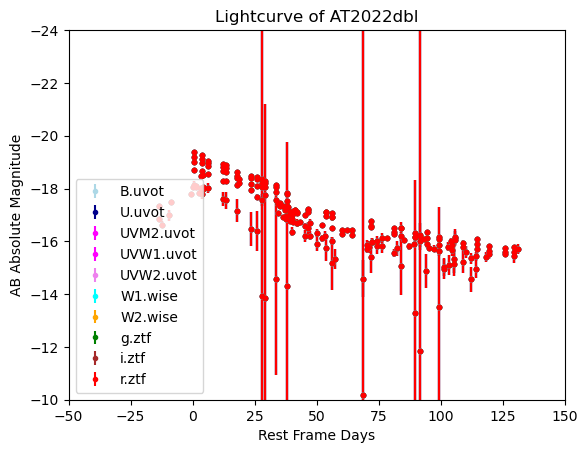

AT2022dbl


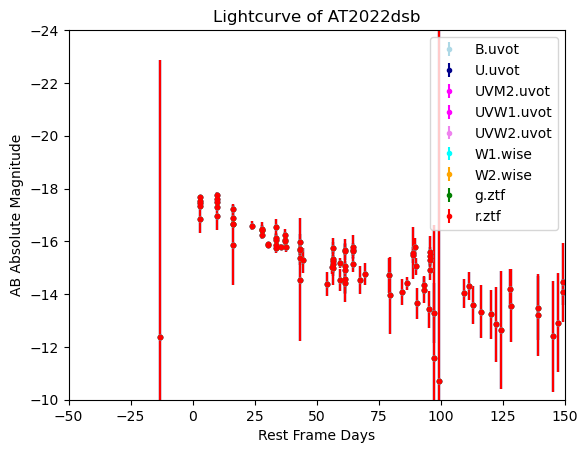

AT2022dsb


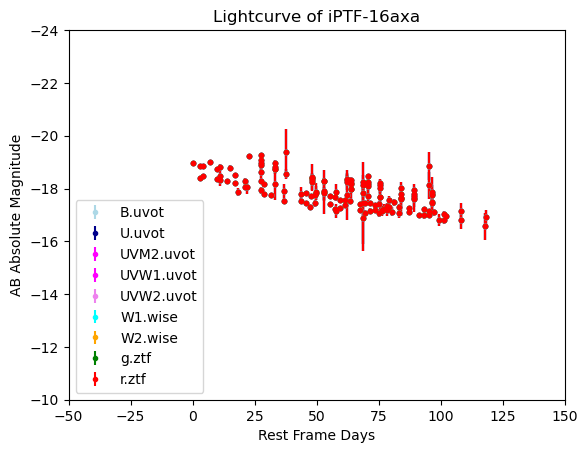

iPTF-16axa


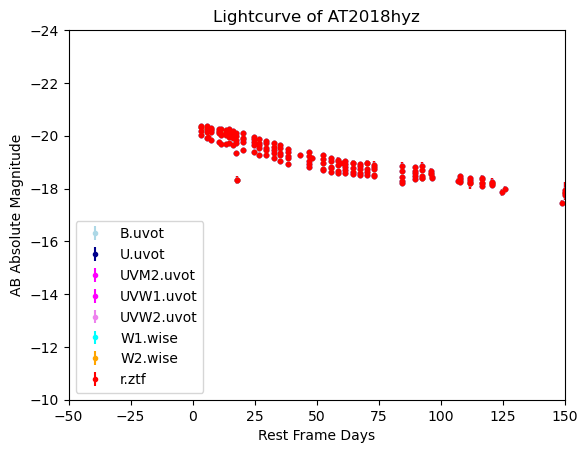

AT2018hyz


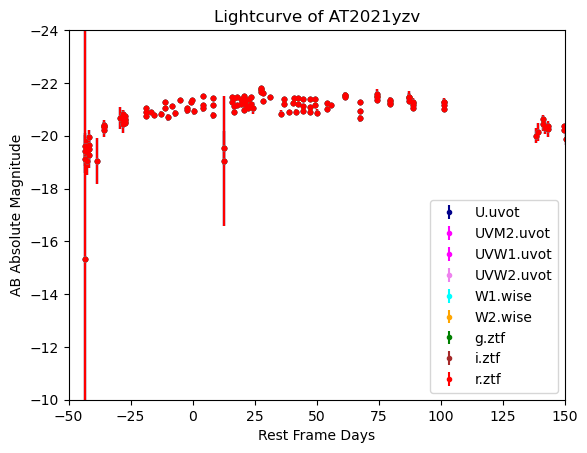

AT2021yzv


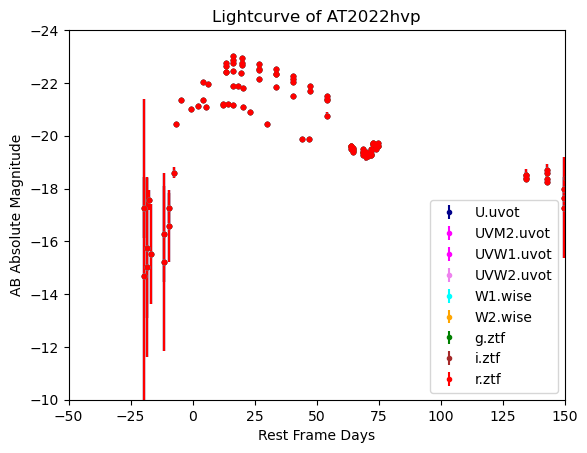

AT2022hvp


In [127]:
def plot_lightcurve(tde_name):
    with open("/Users/snorris/manyTDE/data/sources/{}.json".format(tde_name)) as f:
        tde_data = json.load(f)
    flux_filter = []
    mag_filter = []
    absMag_filter = []
    error_filter = []
    flux_error_filter = []
    mag_error_filter = []
    mjd_date_filter = []
    peak_date_filter = []
    rest_time_filter = []
    lc_filters = tde_data['lightcurve']['filters']
    colors = []
    for i in range (len(tde_data['lightcurve']["data"])):
        peak_year = tde_data.get('peak_mjd')
        flux_filter.append(tde_data['lightcurve']["data"][i][2])
        error_filter.append(tde_data['lightcurve']["data"][i][3])
        mjd_date_filter.append(tde_data['lightcurve']["data"][i][0])
        distance = (sol*tde_data.get('z'))/Ho         
    distance_pc = distance.to(u.pc)
    distance_mod = (5*np.log10(distance_pc/(10*u.pc)))
    flux_filter = u.Jy*np.array(flux_filter)
    mag_filter = u.Magnitude(flux_filter.to(u.AB))     
    absMag_filter = mag_filter.value - distance_mod
    flux_error_filter = u.Jy * np.array(error_filter)
    mjd_date_filter= np.array(mjd_date_filter)
    peak_date_filter = mjd_date_filter - peak_year
    rest_time_filter = peak_date_filter*np.sqrt(1-tde_data.get('z')**2)
    mag_error_filter = np.sqrt((2.5/np.log(10))*(flux_error_filter/flux_filter)**2) 
    for element in lc_filters: 
        lightcurve = plt.errorbar(rest_time_filter,absMag_filter,yerr = mag_error_filter,fmt='.',label= element, color = lc_color_dict[element])
        plt.gca().invert_yaxis()
        plt.xlim(-50,150)
        plt.ylim(-10,-24)
        plt.legend()
        plt.xlabel("Rest Frame Days")
        plt.ylabel("AB Absolute Magnitude")
        plt.legend()
        plt.title("Lightcurve of {}".format(tde_name))
    plt.show()
    return(print(tde_name),lightcurve)
for json_file in json_list:
    tde_name = json_file[:-5]
    plot_lightcurve(tde_name) 
#plot_lightcurve(json_list[60].replace('.json',''))

In [161]:
def plot_lightcurve(tde_name):
    with open("/Users/snorris/manyTDE/data/sources/{}.json".format(tde_name)) as f:
        tde_data = json.load(f)
    flux_filter = []
    mag_filter = []
    absMag_filter = []
    error_filter = []
    flux_error_filter = []
    mag_error_filter = []
    mjd_date_filter = []
    peak_date_filter = []
    rest_time_filter = []
    lc_filters = tde_data['lightcurve']['filters']
    peak_year = tde_data.get('peak_mjd')
    distance = (sol*tde_data.get('z'))/Ho         
    distance_pc = distance.to(u.pc)
    distance_mod = (5*np.log10(distance_pc/(10*u.pc)))
    for element in lc_filters: 
        i_filter = np.where(tde_data['lightcurve']["data"][:][1] == element)
        print(tde_data['lightcurve']["data"])
        break
        flux_filter.append(tde_data['lightcurve']["data"][i][2])
        error_filter.append(tde_data['lightcurve']["data"][i][3])
        mjd_date_filter.append(tde_data['lightcurve']["data"][i][0])
        flux_filter = u.Jy*np.array(flux_filter)
        mag_filter = u.Magnitude(flux_filter.to(u.AB))     
        absMag_filter = mag_filter.value - distance_mod
        flux_error_filter = u.Jy * np.array(error_filter)
        mjd_date_filter= np.array(mjd_date_filter)
        peak_date_filter = mjd_date_filter - peak_year
        rest_time_filter = peak_date_filter*np.sqrt(1-tde_data.get('z')**2)
        mag_error_filter = np.sqrt((2.5/np.log(10))*(flux_error_filter/flux_filter)**2) 
        lightcurve = plt.errorbar(rest_time_filter,absMag_filter,yerr = mag_error_filter,fmt='.',label= element, c = lc_color_dict[element])
        plt.gca().invert_yaxis()
        plt.xlim(-50,150)
        plt.ylim(-10,-24)
        plt.legend()
        plt.xlabel("Rest Frame Days")
        plt.ylabel("AB Absolute Magnitude")
        plt.legend()
        plt.title("Lightcurve of {}".format(tde_name))
    plt.show()
    #return(print(tde_name),print(tde_data['lightcurve']['data'][:][2]),lightcurve)
for json_file in json_list:
    tde_name = json_file[:-5]
    plot_lightcurve(tde_name) 

/var/folders/sf/0bstxplx5xl9vkm7jtbmvr8h0005v1/T/ipykernel_10158/1322202296.py:19: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  i_filter = np.where(tde_data['lightcurve']["data"][:][1] == element)
IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)

